# Lab 7: Event Selection Optimization

## William Olsen, partners with Jennifer Vo

### Introduction

Previously, we explored what the Higgs Boson is and some of its properties (Lab 5).  In this lab we will explore how we can perform event selections in order to increase the significance of our Higgs measurement.  We had previously found that the significance for the discovery of the Higgs was quite low when using the whole data set - however through a series of data cuts we can optimize this significance and increase our confidence regarding the discovery of the Higgs Boson.  We will be using simulated data from the Large Hadron Collider with a transverse momentum between 1000 and 1200.

### Additional Details

Before loading our data, let's recall that we have two sets of data: 100000 Higgs Boson simulated events, of which we have an expected yield of 50 and 100000 QCD background simulated events, of which we have an expected yield of 2000.  We also found that our QCD background is Poisson distributed with a parameter equal to the current expected yield of the QCD simulated data after a series of possible data cuts.  With these values, we can construct ratios to determine the percentage of simulated data that would correspond to a true lab event for both simulated sets of data: the Higgs set and the QCD set.

$$R_{higgs} = \frac{50}{100000} = 0.0005$$

$$R_{qcd} = \frac{2000}{100000} = 0.02$$

With these ratios we can determine the expected yield of true lab measurements after a split.  We can calculate the expected yields for our Higgs events and our QCD events using the following formulas:

$$yield_{higgs} = N_{higgs}*R_{higgs}$$

$$yield_{qcd} = N_{qcd}*R_{qcd}$$

Where $N_{higgs}$ and $N_{qcd}$ are the number of Higgs and QCD simulated events, respectively, after a series of data cuts.

#### Loading the Data

Lets begin by loading our data so we can explore optimizing our discovery sensitivity:

In [1]:
# general imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle

# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
# open the file of interest, and use pickle loading
higgsfile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgsdata = pickle.load(higgsfile)
qcdfile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcddata = pickle.load(qcdfile)

### Problem 1 - Initial Significance

Now that we have loaded our data, let's make a stacked histogram of the feature variable mass.

In [3]:
def plot_stacked_hist(qcd, higgs, feature):
    bins = 100
    fs = 18
    
    # get the data
    feature_qcddata = qcd[f'{feature}']
    feature_higgsdata = higgs[f'{feature}']
    feature_data = [feature_qcddata, feature_higgsdata]
    
    # plot
    plt.hist(feature_data, bins=bins, stacked=True, label=['QCD Background counts', 'Higgs counts']) # add density=True for probability density
    plt.title('Stacked QCD background counts and Higgs counts', fontsize=fs)
    plt.xlabel(f' {feature}', fontsize=fs)
    plt.ylabel('Event counts', fontsize=fs)
    plt.tick_params(labelsize=fs)
    plt.legend()
    
    plt.show()

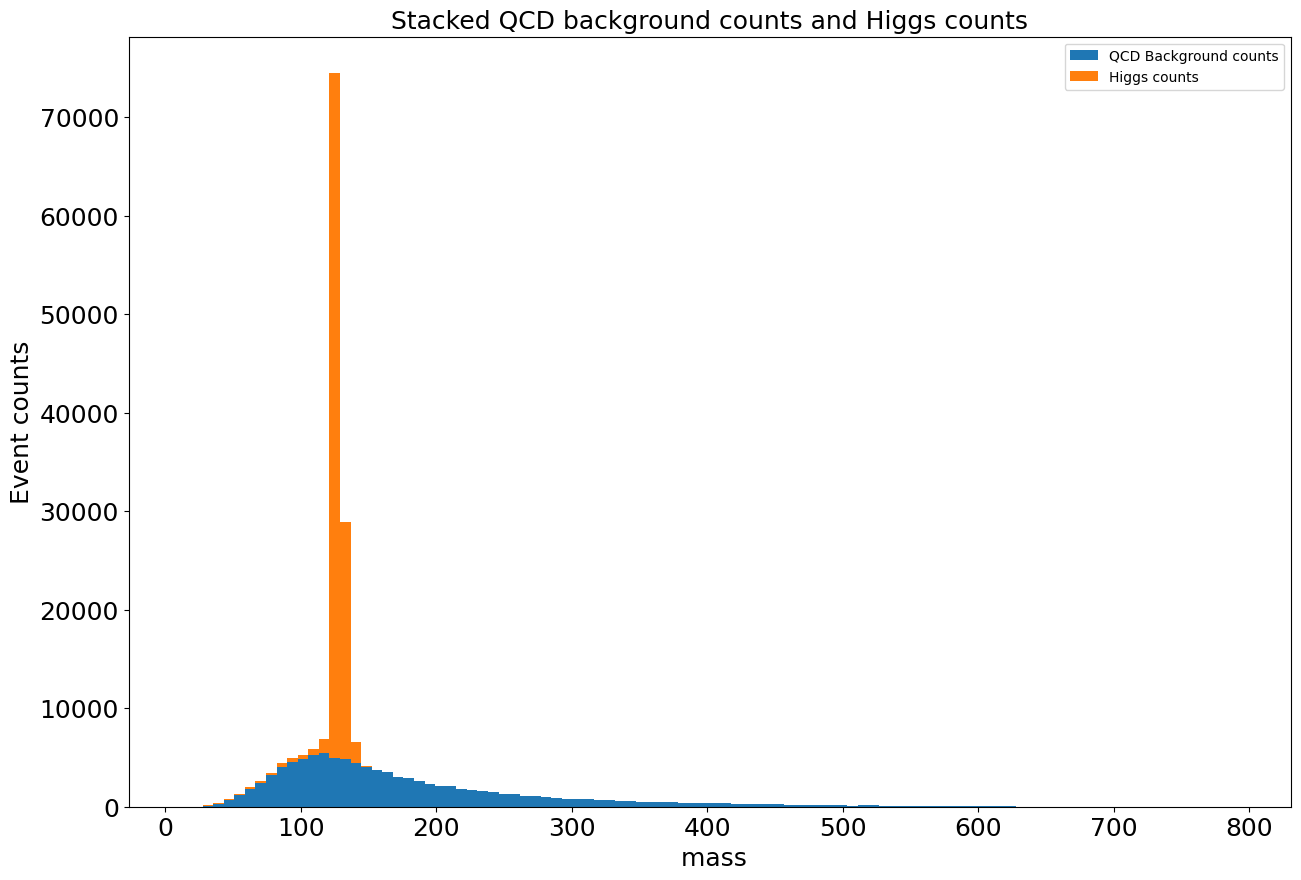

In [4]:
plot_stacked_hist(qcddata, higgsdata, 'mass')

We can see from above that the Higgs data is closely grouped around a small range of values while the QCD Background events are more spread out over different mass values.  Specifically from the plot above we observe that the mass of the events from the QCD distribution are widely spread from a value of around $0 \ GeV/c^2$ to $700 \ GeV/c^2$ but for the Higgs distribution the mass of the events almost always lie within the range $50 \ GeV/c^2$ to $150 \ GeV/c^2$. As expected, the range of values covered by the Higgs Boson events is smaller than that of the QCD background events.  This was our expectation because we know that the Higgs Boson should have a mass around $125 \ GeV/c^2$.

#### Calculating the significance

Now that we have visualized this stacked histogram, let's calculate the expected significance associated with the Higgs Boson without any event selections.  As previously stated, our background is Poisson distribution so we will use Poisson statistics for the significance calculation.  Let's calculate this significance by answering the following question:

> What is the significance of my signal of 2050 jets provided the QCD background, which is a Poisson distribution with parameter 2000 jets?

Our signal is 2050 because that is the expected yield of the QCD background and the Higgs Boson data added together and our parameter for the Poisson background is dictated by the expected yield of the QCD background.  Now we can calculate this significance:

In [5]:
def compute_poisson_sigma_value(lambda_, value):
    # determine the probability associated with this value
    value_prob = stats.poisson.sf(value, lambda_)

    # use the inverse survival function to determine the sigma that has the same associated probability
    sigma = stats.norm.isf(value_prob)

    return sigma

def compute_poisson_specific_sigma_value(sigma, lambda_):
    # use the inverse survival function to determine the probability associated with 5sigma
    prob_sigma = stats.norm.sf(sigma)
    
    # determine the value associated with this probability
    value = stats.poisson.isf(prob_sigma, lambda_)

    return value

In [6]:
# define our variables
signal_0 = 2050
lambda_0 = 2000

# compute and print the significance for our signal
signal_0_sigma = compute_poisson_sigma_value(lambda_0, signal_0)
print(f'The significance of our signal of {signal_0} jets is {signal_0_sigma:.4f} sigma.')

The significance of our signal of 2050 jets is 1.1282 sigma.


#### Analysis of results

We can see that the significance of our signal is only $1.1282\sigma$ but we need a significance of $5\sigma$ to claim a discovery.  We can compare this exact significance to an approximation of the significance which can be calculated in the following way:

$$\sigma_{approx} = \frac{N_{higgs}}{\sqrt{N_{qcd}}} = \frac{50}{\sqrt{2000}} = 1.1180$$

Comparing these two values we see that the approximation is quite close to the exact sigma that we calculated of $1.128$ however they are not the same value.

Let's explore why these values are similar.  Firstly, it is known that when the parameter of a Poisson gets quite large the Poisson distribution will behave more accordingly to a Gaussian and thus the distribution will approximately follow Gaussian statistics.  In this situation it is also know that this Poisson distribution with a large parameter will converge to a Gaussian with standard deviation, $\sigma=\sqrt{\lambda}$ where $\lambda$ is the parameter of the Poisson distribution.

Here the parameter to our background Poisson distribution is $N_{qcd}$ thus the standard deviation of our approximate Gaussian is $\sigma=\sqrt{N_{qcd}}$.  Now as the mean of this Poisson distribution, and thus Gaussian, is $N_{qcd}$ we know that our signal $N_{higgs}+N_{qcd}$ is simply the mean value of the distribution plus some value.  This concept is exactly what standard deviation captures - what value you must add to the mean to be $1\sigma$ away, $2\sigma$ away, and so on (when comparing to a Normal distribution).  

Thus if we would like to determine approximately how far away $N_{higgs}$ is from the mean of the distribution - this determining the significance of our measurement - we would evaluate the equation $\frac{N_{higgs}}{\sqrt{N_{qcd}}}$.

### Problem 2 - A mass cut

Now that we have computed the base significance of the data - $1.1282\sigma$ - let's experiment with different data cuts on the mass feature and see how our significance changes for each data cut.  We previously observed that the Higgs Boson data largely lies between $50 \ GeV/c^2$ and $150 \ GeV/c^2$ so to find the best cut we will explore cuts of size 20 within this range.

We will begin with a cut from $50 \ GeV/c^2$ to $70 \ GeV/c^2$ where we keep all of the data from the Higgs Boson set and the QCD background set that have a mass between these two values and we will calculate our significance.  Once we have done this cut  we will increment our window start and end by $10 \ GeV/c^2$ and compute the significance for this new cut.  We will continue this process until the right value for our window reaches $150 \ GeV/c^2$.  As we perform these cuts we will keep in mind that our goal is to eliminate as much background as possible while preserving our Higgs events.  Thus we will limit that we must preserve at least 90% of the Higgs events.  If a cut causes us to have less than 90% of the original Higgs events then it is not a desirable slice.

Let's now perform these sequential cuts and determine which cut yields the best significance:

In [7]:
def compute_yields(N_qcd, N_higgs):
    R_qcd = 2000 / 100000
    R_higgs = 50 / 100000
    
    return int(N_qcd * R_qcd), int(N_higgs * R_higgs)

def slice_data(qcd, higgs, feature, min_value, max_value):
    # cut the qcd background data
    qcd_sliced = qcd.drop(qcd[qcd[feature] < min_value].index)
    qcd_sliced = qcd_sliced.drop(qcd_sliced[qcd_sliced[feature] > max_value].index)
    
    # cut the higgs boson data
    higgs_sliced = higgs.drop(higgs[higgs[feature] < min_value].index)
    higgs_sliced = higgs_sliced.drop(higgs_sliced[higgs_sliced[feature] > max_value].index)
    
    # now that we have sliced the data lets get the new data counts and new yields
    N_qcd = len(qcd_sliced)
    N_higgs = len(higgs_sliced)
    yield_qcd, yield_higgs = compute_yields(N_qcd, N_higgs)
    
    # calculate the percentage of events remaining
    percent_qcd_left = (len(qcd_sliced) / len(qcddata)) * 100
    percent_higgs_left = (len(higgs_sliced) / len(higgsdata)) * 100
    
    # now that we have the new yields we can compute the new significance
    signal = yield_qcd + yield_higgs
    lambda_ = yield_qcd
    signal_sigma = compute_poisson_sigma_value(lambda_, signal)
    print(f'After a cut on the data with respect to {feature} between values {min_value} and {max_value} the discovery significance became {signal_sigma:0.4f} sigma.')
    print(f'Additionally, after this cut we have {percent_higgs_left:.2f}% of the overall Higgs remaining and {percent_qcd_left:.2f}% of the overall background remaining.\n')
    
    return qcd_sliced, higgs_sliced, signal_sigma

def iterative_slices(qcd, higgs, feature, start, end, width, increment):
    min_values = []
    max_values = []
    qcd_sliced = []
    higgs_sliced = []
    signal_sigma = []
    
    min_value = start
    max_value = start + width
    best_sigma = -100
    best_sigma_index = -1
    while max_value <= end:
        curr_qcd_sliced, curr_higgs_sliced, curr_signal_sigma = slice_data(qcd, higgs, feature, min_value, max_value)
        
        # store the values for this iteration
        min_values.append(min_value)
        max_values.append(max_value)
        qcd_sliced.append(curr_qcd_sliced)
        higgs_sliced.append(curr_higgs_sliced)
        signal_sigma.append(curr_signal_sigma)
        
        # update our best result if needed
        if curr_signal_sigma > best_sigma:
            best_sigma = curr_signal_sigma
            best_sigma_index = len(signal_sigma) - 1
            
        # increment
        min_value += increment
        max_value += increment
        
    # return only the best information
    return qcd_sliced[best_sigma_index], higgs_sliced[best_sigma_index], signal_sigma[best_sigma_index], min_values[best_sigma_index], max_values[best_sigma_index]
        

In [8]:
mass_best_qcd_sliced, mass_best_higgs_sliced, mass_best_signal_sigma, mass_best_min_value, mass_best_max_value = iterative_slices(qcddata, higgsdata, 'mass', 50, 150, 20, 10)

After a cut on the data with respect to mass between values 50 and 70 the discovery significance became 0.0750 sigma.
Additionally, after this cut we have 0.51% of the overall Higgs remaining and 3.99% of the overall background remaining.

After a cut on the data with respect to mass between values 60 and 80 the discovery significance became 0.0606 sigma.
Additionally, after this cut we have 0.68% of the overall Higgs remaining and 6.08% of the overall background remaining.

After a cut on the data with respect to mass between values 70 and 90 the discovery significance became 0.0507 sigma.
Additionally, after this cut we have 0.79% of the overall Higgs remaining and 8.65% of the overall background remaining.

After a cut on the data with respect to mass between values 80 and 100 the discovery significance became 0.0451 sigma.
Additionally, after this cut we have 0.95% of the overall Higgs remaining and 10.90% of the overall background remaining.

After a cut on the data with respect t

The above information is quite muddled so lets print the information associated with which data cut provided the highest significance:

In [9]:
print((f'The slice that provided the highest significance of {mass_best_signal_sigma:0.4f} sigma was when we kept\n'
       f'the events with a mass between the values {mass_best_min_value} and {mass_best_max_value}\n'))

print(f'{(1 - len(mass_best_qcd_sliced) / len(qcddata)) * 100:0.2f}% of the QCD background data was eliminated in this split.')
print(f'{(1 - len(mass_best_higgs_sliced) / len(higgsdata)) * 100:0.2f}% of the Higgs Boson data was eliminated in this split.')

The slice that provided the highest significance of 2.9261 sigma was when we kept
the events with a mass between the values 120 and 140

87.48% of the QCD background data was eliminated in this split.
4.78% of the Higgs Boson data was eliminated in this split.


#### Analysis

After performing the nine mass cuts above we found that the mass cut that provided the highest significance is when we slice the data with respect to the feature mass and keep all events with a mass between $120 \ GeV/c^2$ and $140 \ GeV/c^2$.  Not only did this slice provide the best significance - $2.9261\sigma$ - it also maximized the number of Higgs events left after the cut (95.22%) while minimizing the number of QCD events left (12.52%) - that is in comparison to the other cuts made.  Now that we have this value we can decide if we would like to continue to cut the data further with this mass cut as a baseline split.

### Problem 3 - Impact of the mass cut on the other features

To determine how we might proceed given the mass cut that we found previously let's plot two stacked histograms for each feature.  The first plot will be a stacked histogram of the QCD and Higgs event counts with respect to the current feature provided that the mass cut has not been performed.  The second plot will be of the event counts for both QCD and Higgs again but after the mass cut has been performed.  Let's generate these plots for each feature minus mass because we just split on mass:

In [10]:
def plot_stacked_hist_comparison(qcd, higgs, qcd_sliced, higgs_sliced, feature, cut_desc):
    bins = 100
    fs = 10
    
    # get the data
    feature_qcddata = qcd[f'{feature}']
    feature_higgsdata = higgs[f'{feature}']
    feature_data = [feature_qcddata, feature_higgsdata]
    
    feature_qcddata_sliced = qcd_sliced[f'{feature}']
    feature_higgsdata_sliced = higgs_sliced[f'{feature}']
    feature_data_sliced = [feature_qcddata_sliced, feature_higgsdata_sliced]
    
    # plot the base stacked histogram
    plt.subplot(2, 1, 1)
    plt.hist(feature_data, bins=bins, stacked=True, label=['QCD Background counts', 'Higgs counts'])
    plt.title('Stacked QCD background counts and Higgs counts', fontsize=fs)
    plt.xlabel(f' {feature}', fontsize=fs)
    plt.ylabel('Event counts', fontsize=fs)
    plt.tick_params(labelsize=fs)
    plt.legend()
    
    # plot the stacked histogram after the slice
    plt.subplot(2, 1, 2)
    plt.hist(feature_data_sliced, bins=bins, stacked=True, label=['QCD Background counts', 'Higgs counts'])
    plt.title(f'Stacked QCD background counts and Higgs counts {cut_desc}', fontsize=fs)
    plt.xlabel(f' {feature}', fontsize=fs)
    plt.ylabel('Event counts', fontsize=fs)
    plt.tick_params(labelsize=fs)
    plt.legend()
    
    plt.show()

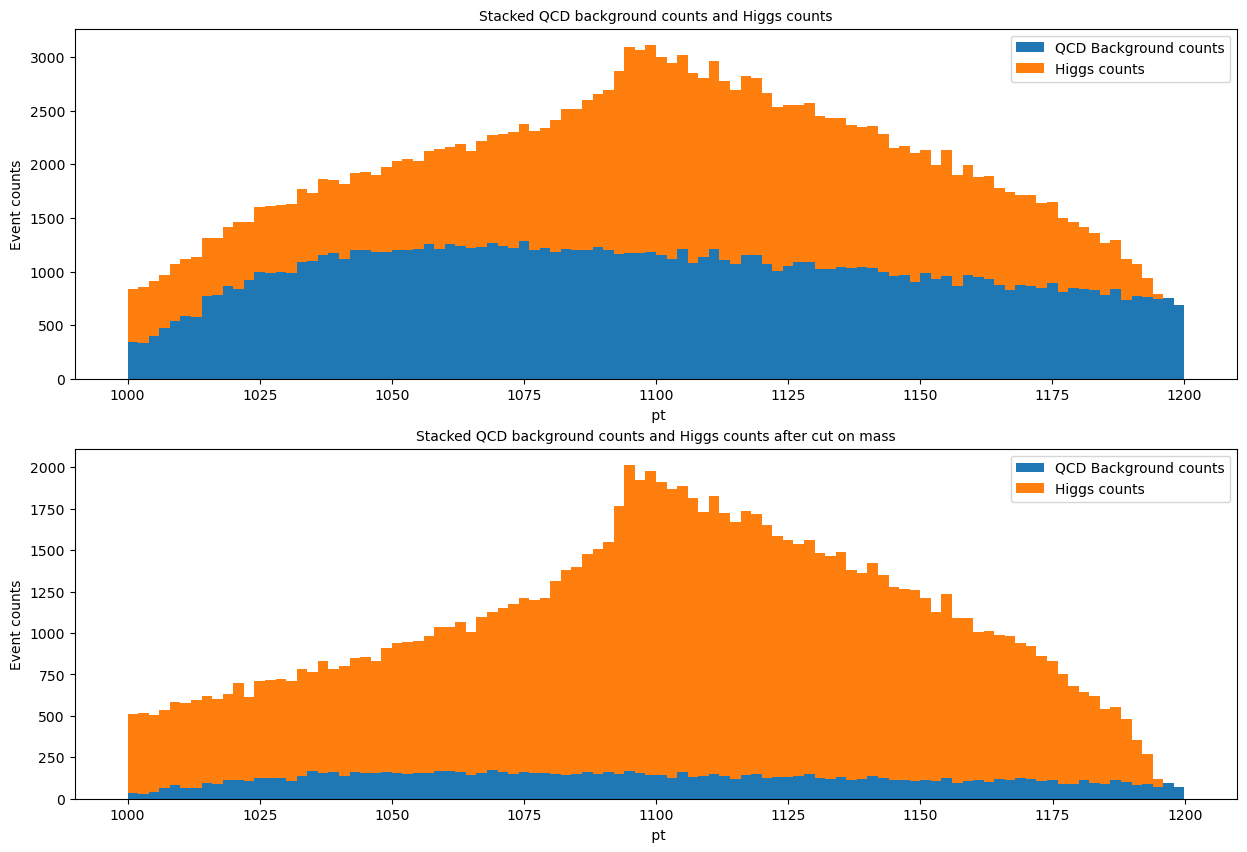

In [11]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 'pt', 'after cut on mass')

We see that before and after the cut the Higgs data and the QCD data are both spread out throughout the range of pT values thus there is not much motivation to split on this feature until possibly much much later.  Currently a cut on this feature would not be productive as it would throw out more Higgs than background.

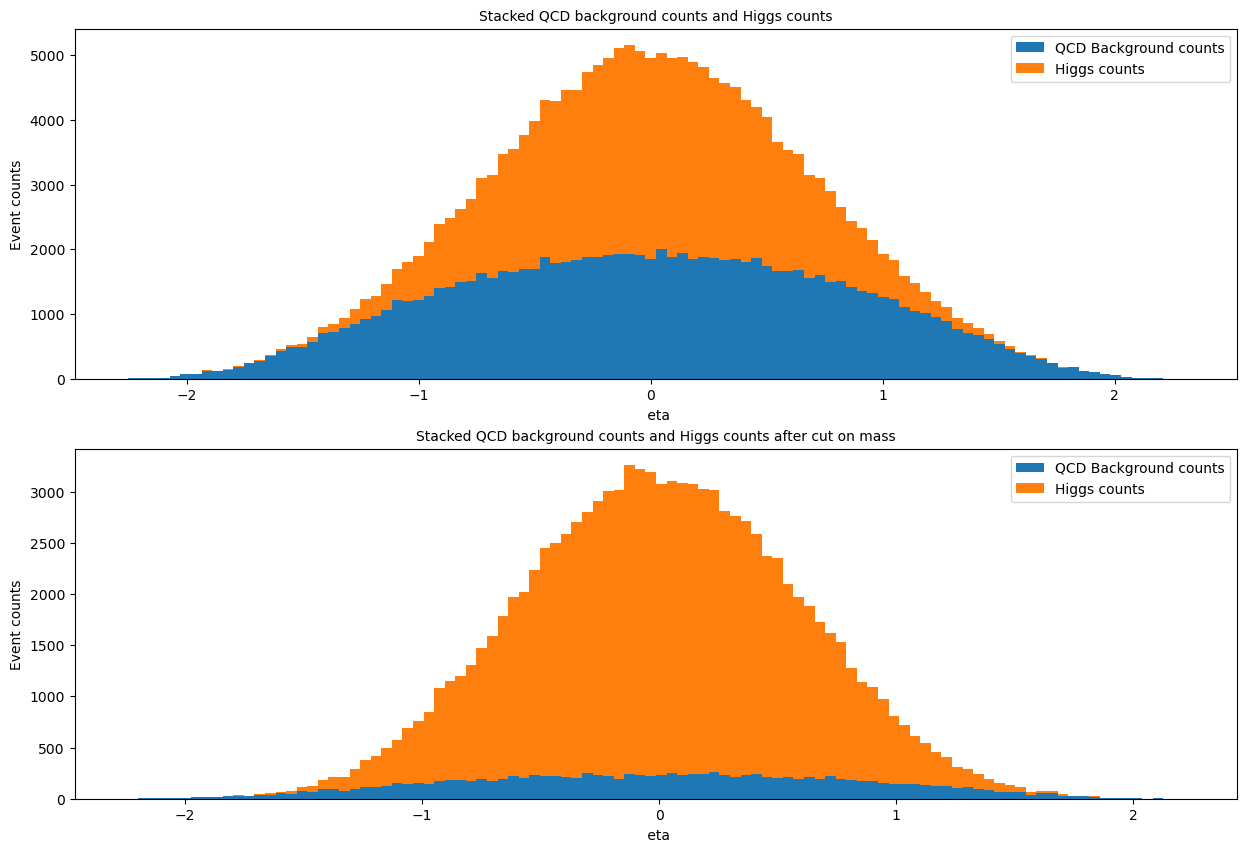

In [12]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 'eta', 'after cut on mass')

We see above that after the mass cut the number of QCD events was drastically decreased however the Higgs events seem to be Gaussian distributed so a cut on this feature would not be productive as it would throw out more Higgs than background.

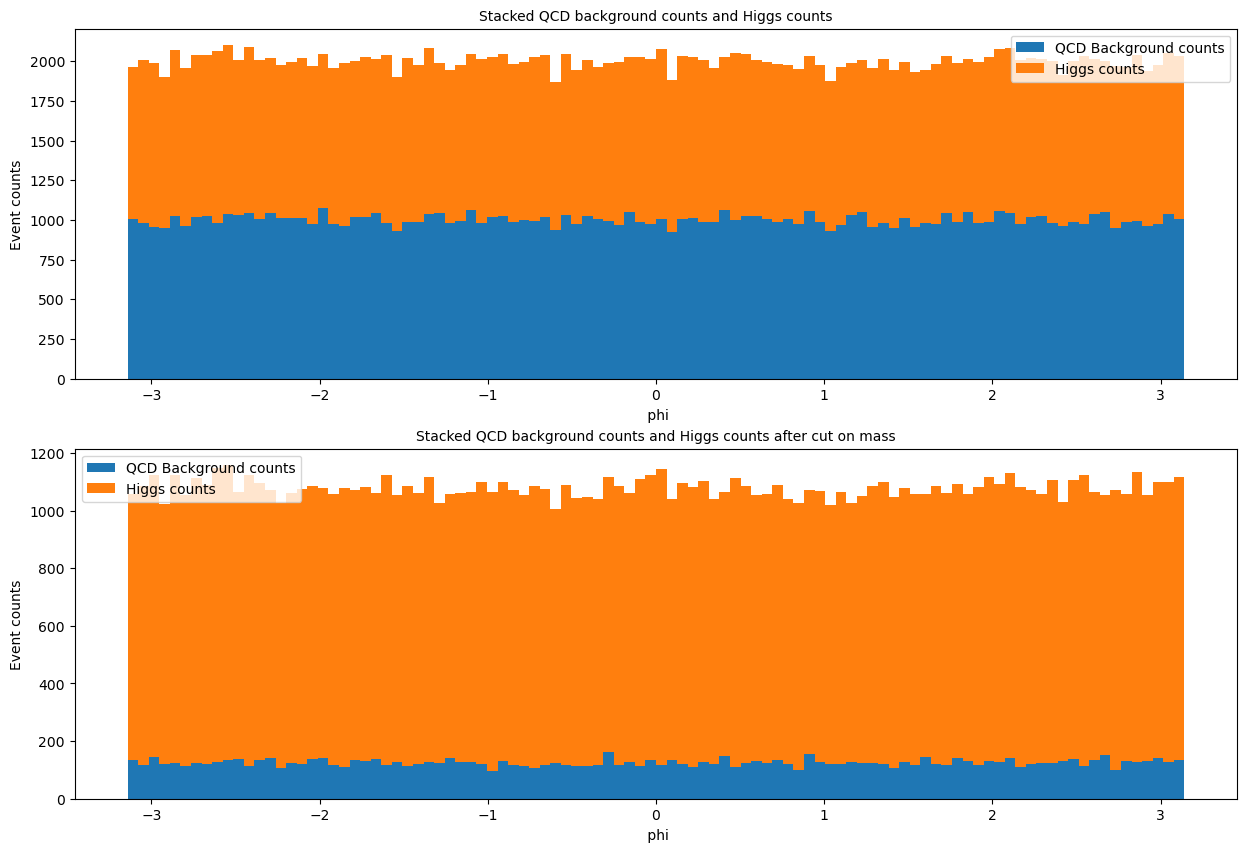

In [13]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 'phi', 'after cut on mass')

We previously found that phi was not a discriminatory feature thus a cut on this feature would not be productive as it would throw out more Higgs than background.

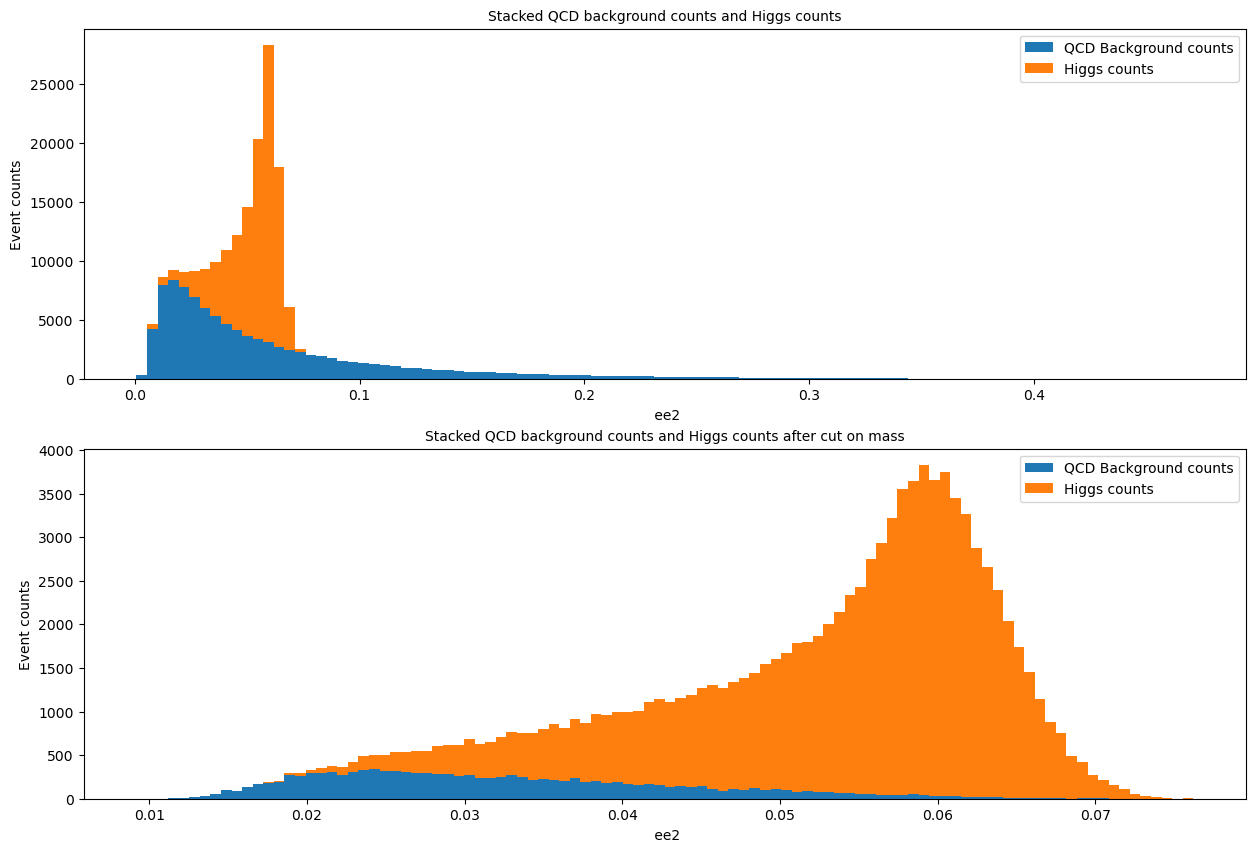

In [14]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 'ee2', 'after cut on mass')

From the above we see that splitting on ee2 may have been a desirable split in the beginning it would not have been as desirable as splitting on the mass.  When looking at after the split we see that there is an opportunity to make a split that will eliminate many of the background events while maximizing the number of Higgs events in our data set.

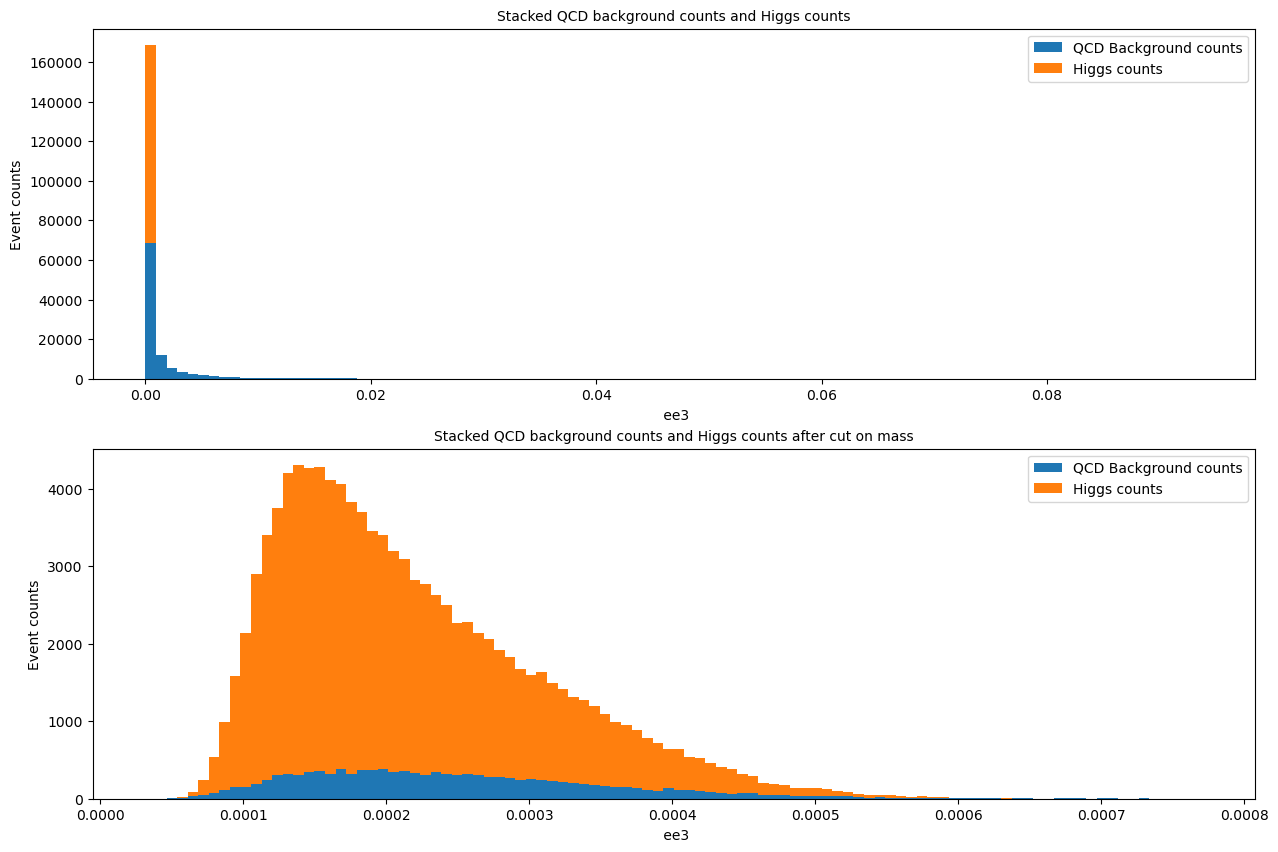

In [15]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 'ee3', 'after cut on mass')

From the above plots we see that this feature is not very desirable to split on as both the background and the Higgs data sets have very similar peaks so splitting on this feature could result in negative returns.

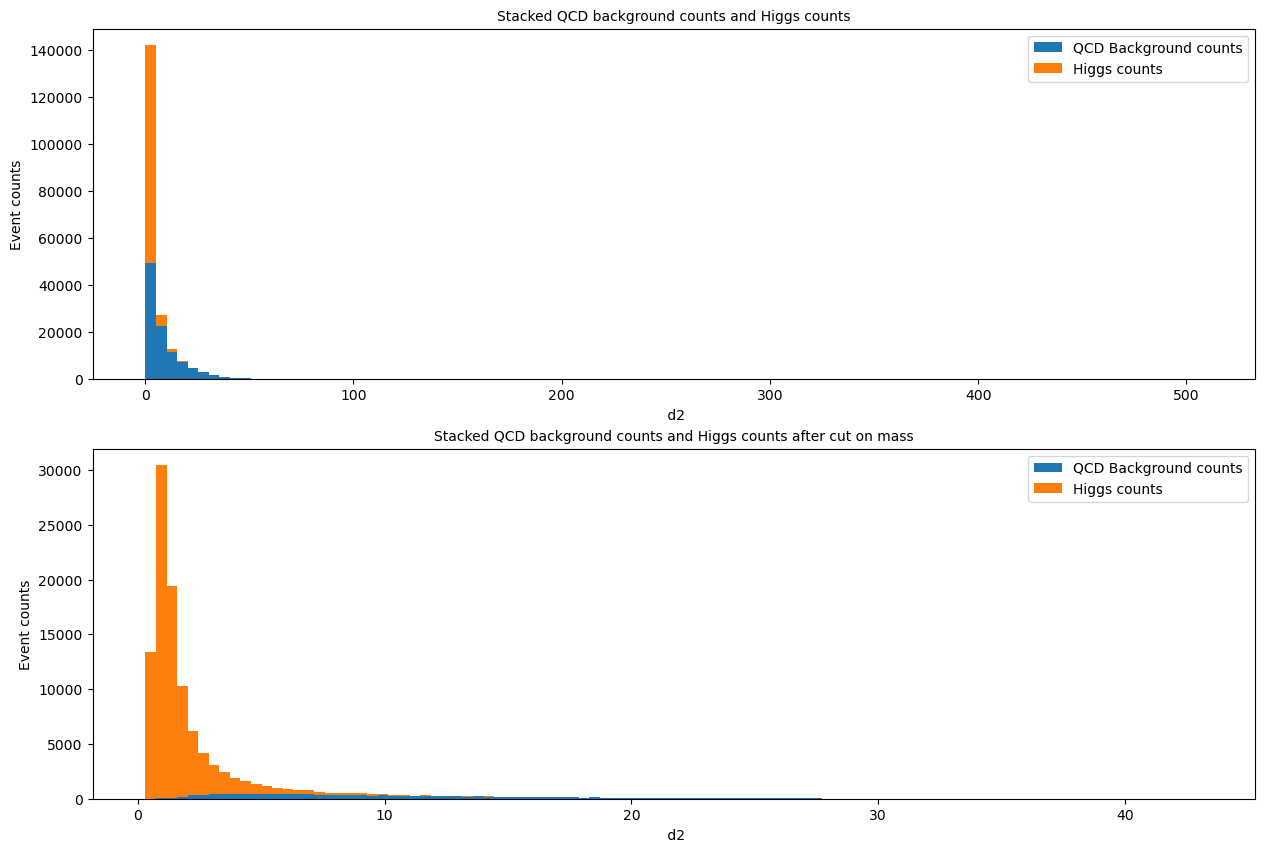

In [16]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 'd2', 'after cut on mass')

From the above plot we see that originally splitting on this feature was not very desirable however after the split there is an opportunity to throw away some of the background events without throwing away almost any of the Higgs events.  This split could be keeping values between 0 and 10.

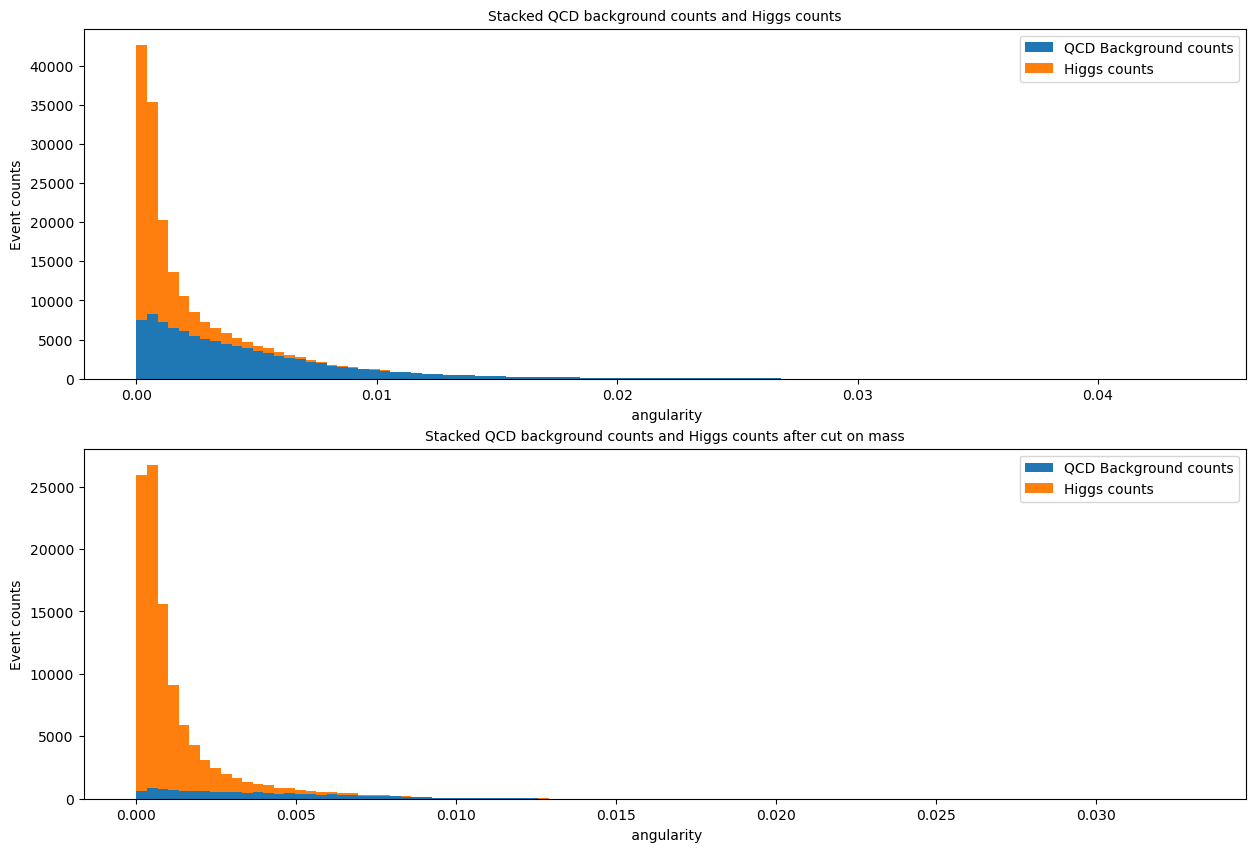

In [17]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 'angularity', 'after cut on mass')

From the above plots we see that before the mass split both the background and Higgs data had very similar peaks with respect to the feature angularity but that does not mean that there was not an opportunity to improve the significance with a split.  After splitting we could imagine keeping data between 0 and 0.007 however this likely only provide a slight improvement to the significance.

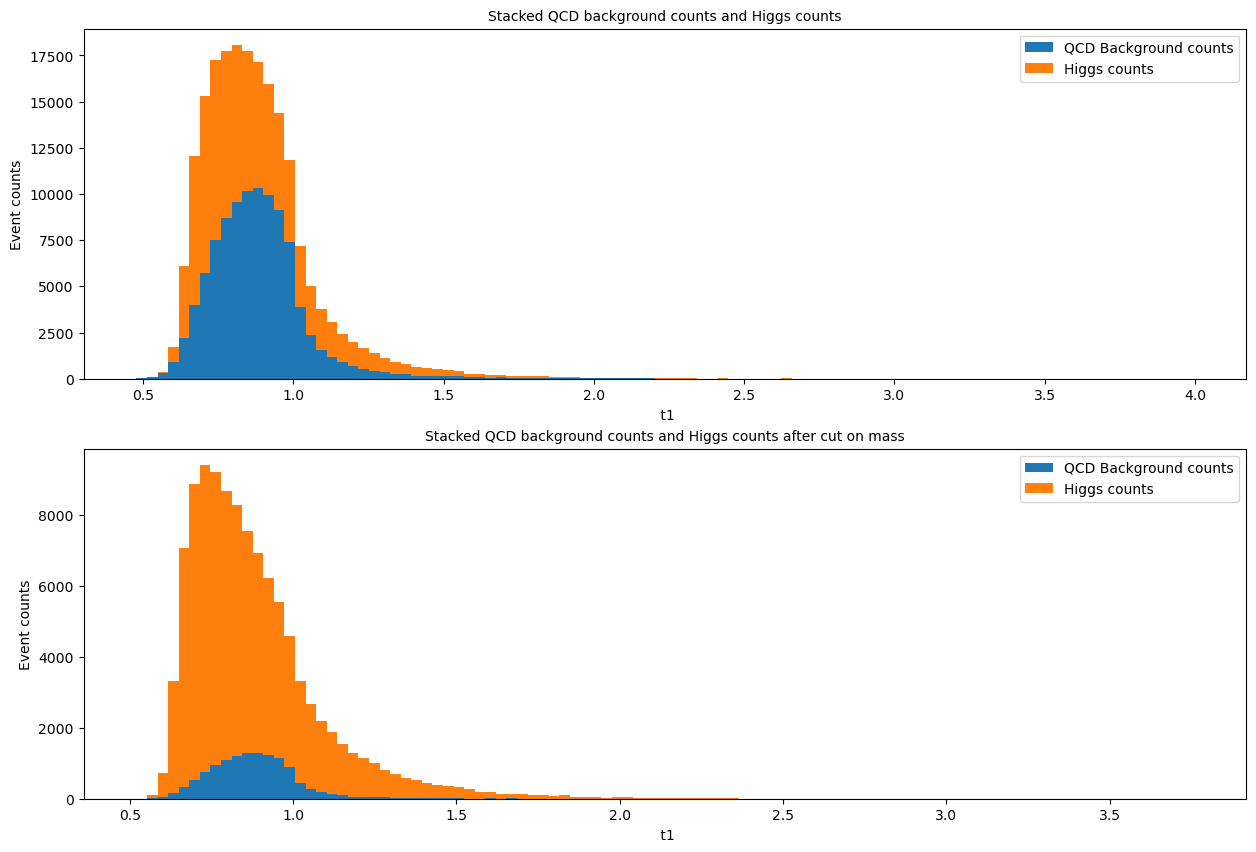

In [18]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 't1', 'after cut on mass')

From the above plots we see that before and after the split both the background and the Higgs data are highly correlated so splitting on t1 is not desirable.

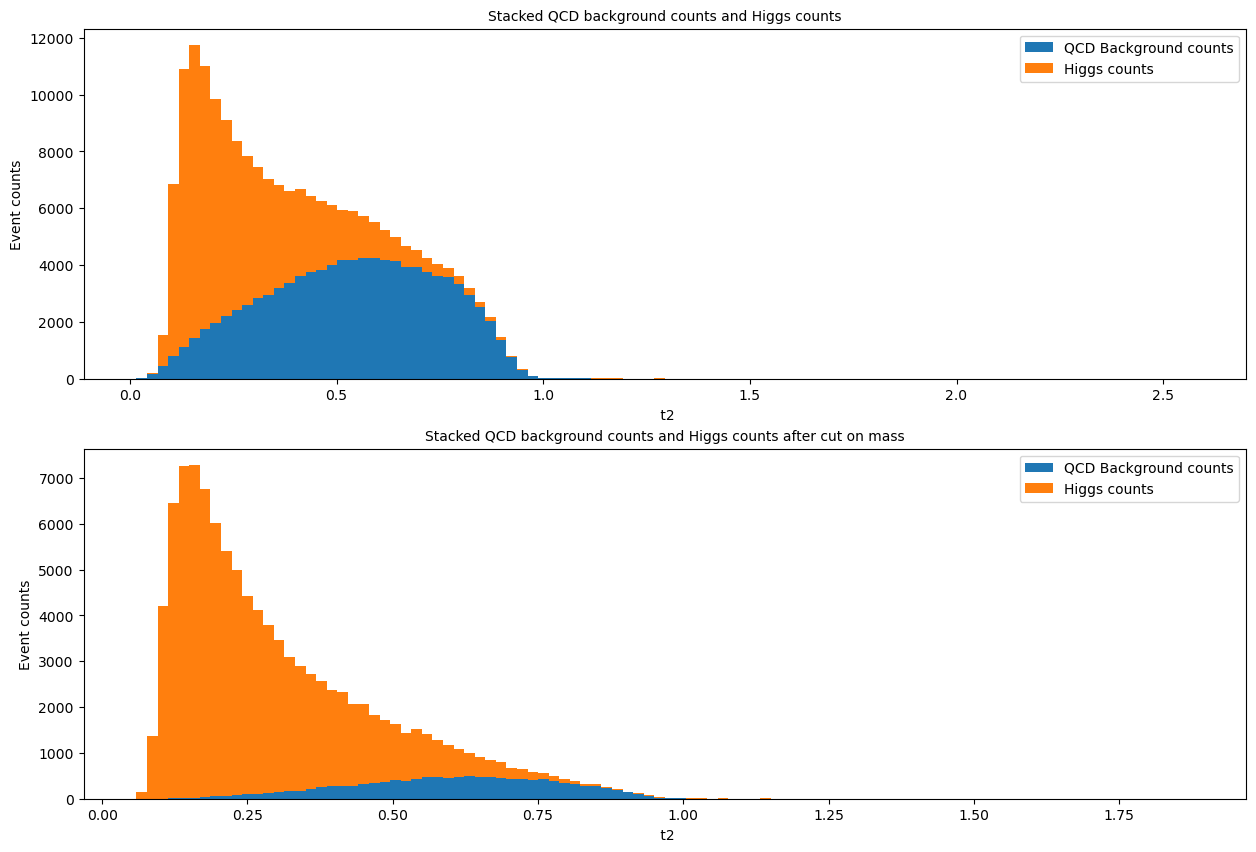

In [19]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 't2', 'after cut on mass')

From the above plots of t2 we can conclude that there is an opportunity to split on this feature to improve the significance if we were to split from 0 to 0.625 or 0.75.  Prior to the mass split this feature, while discriminatory, does not provide a convincing argument to split on it.

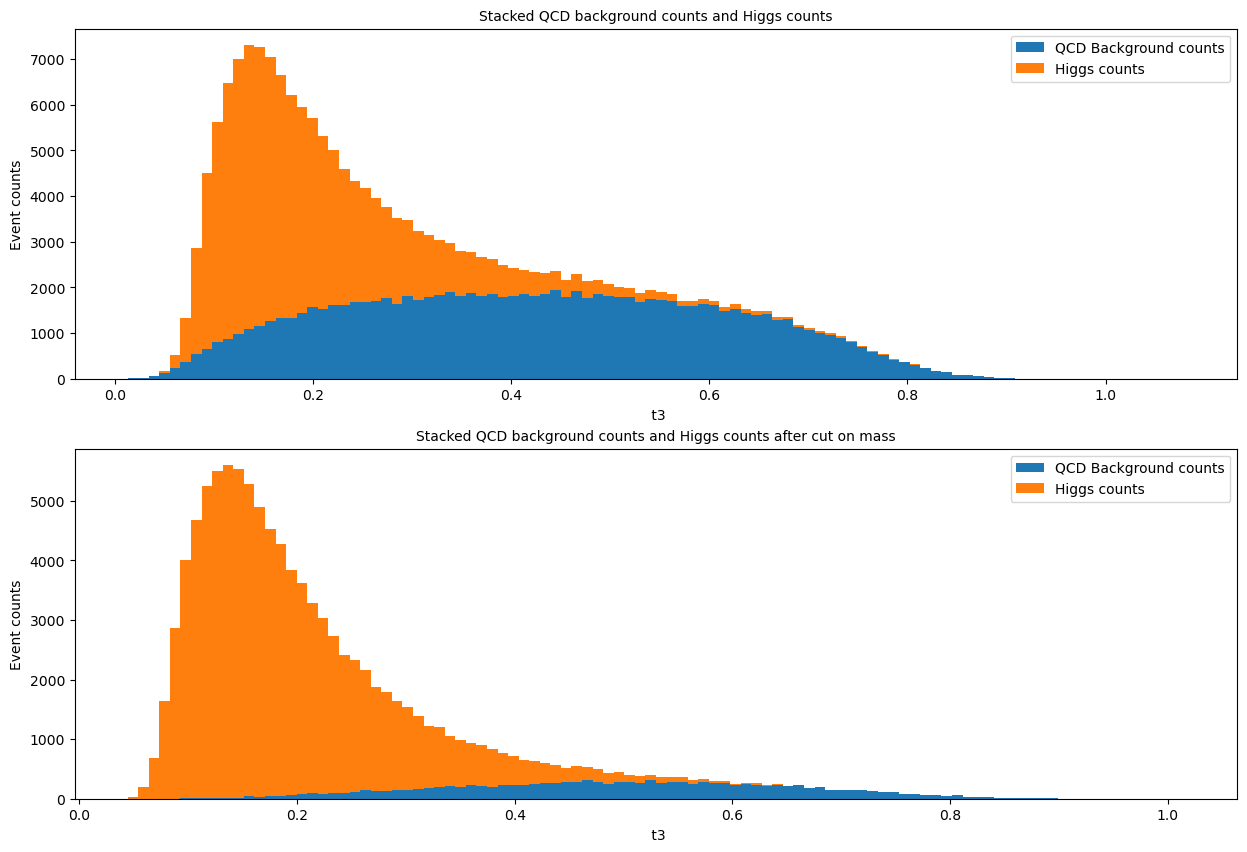

In [20]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 't3', 'after cut on mass')

From the above plot we see that splitting on t3 from 0 to 0.5 would have provided a great split to the data - eliminating nearly half of the background while preserving almost all of the Higgs data.  This split is great however it is not nearly as efficient as the mass split which eliminated nearly 87% of the background while only losing 5% of the Higgs data.  

After the mass split the opportunity to throw away nearly half of the background events is still available if we were to split between 0 and 0.5.

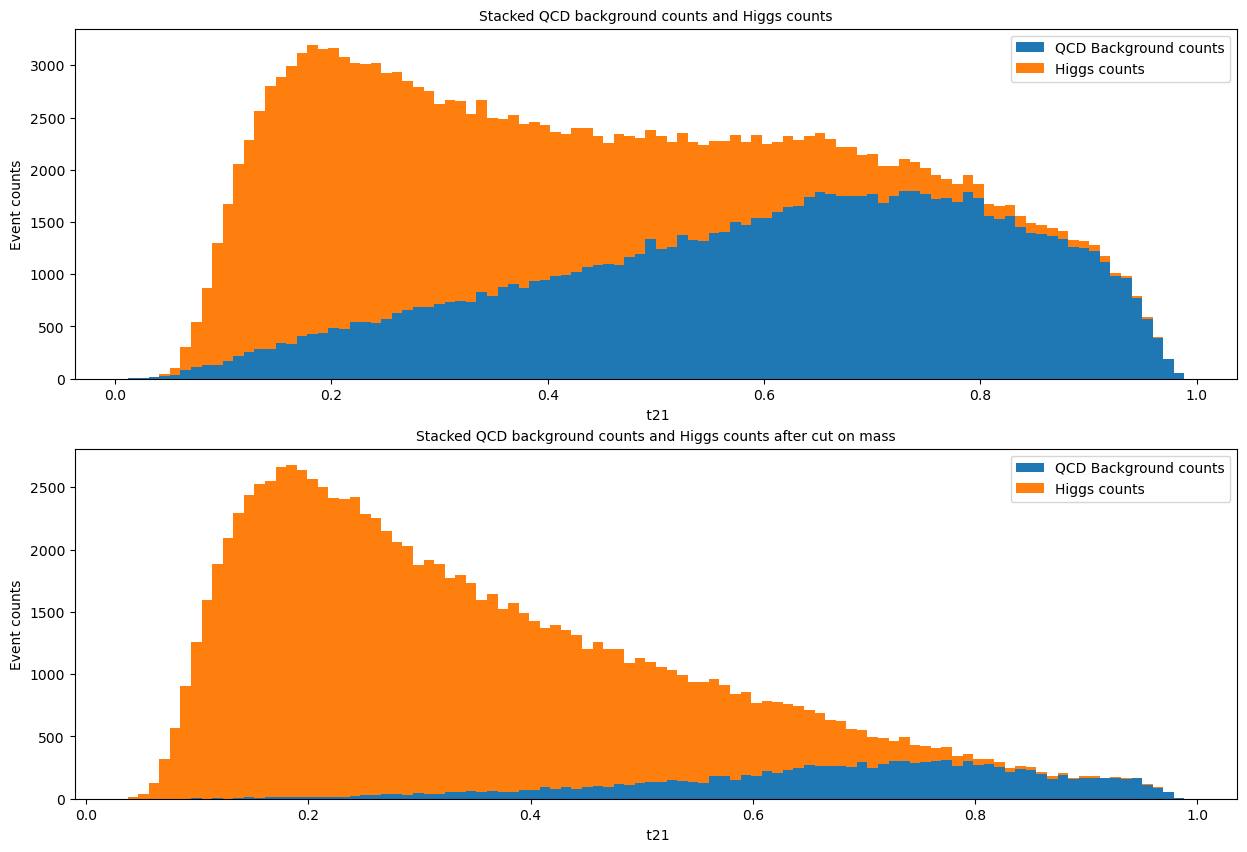

In [21]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 't21', 'after cut on mass')

Prior to the mass split we can conclude that while this feature is discriminatory, splitting on it would not provide the most desirable results when compared to other features.  After the mass split we can see an opportunity to split from around 0 to 0.75 which would eliminate much of the background while preserving the Higgs Boson data.

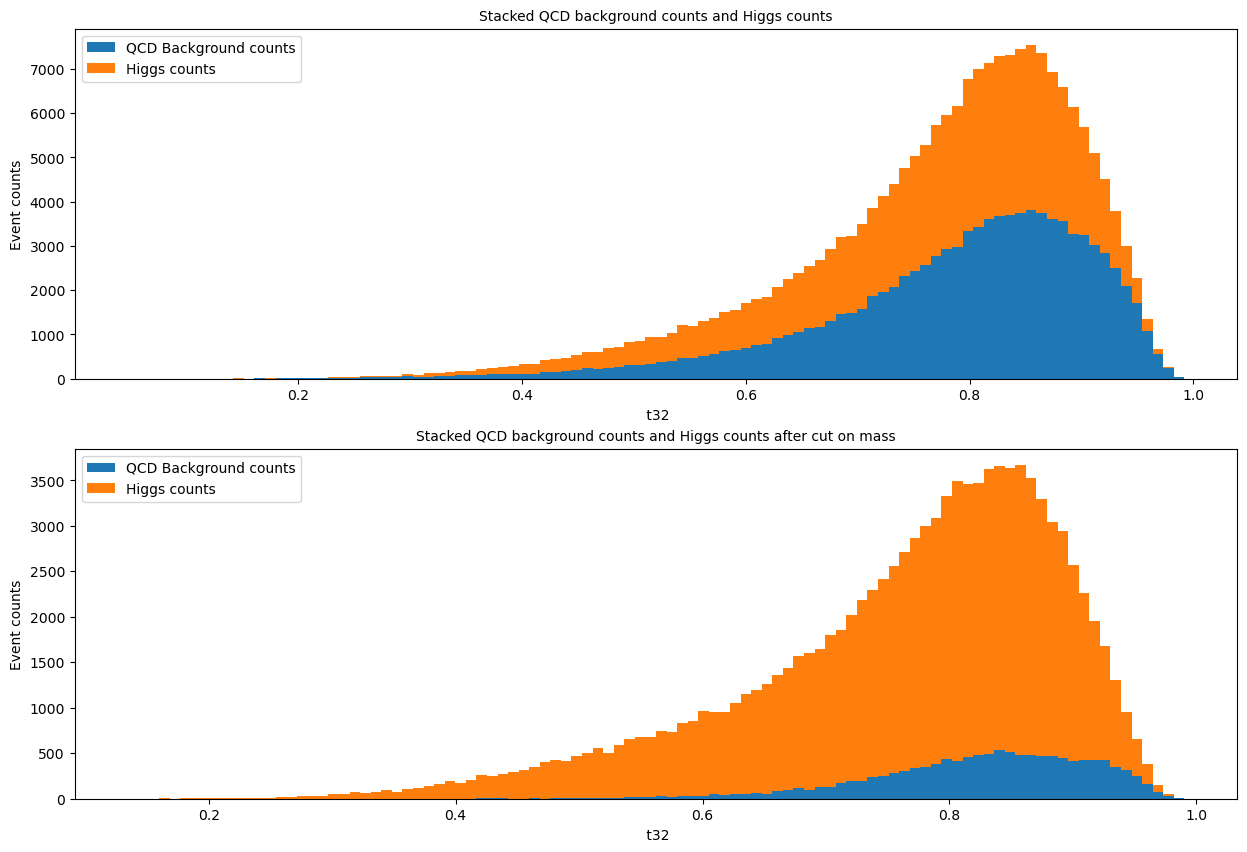

In [22]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 't32', 'after cut on mass')

We see from above that the peaks of the Higgs data and QCD data for the feature t32 are largely aligned before and after the mass split, thus this feature is not desirable to split on.  We also previously found that t32 does not provide discriminatory power so this result is not surprising.

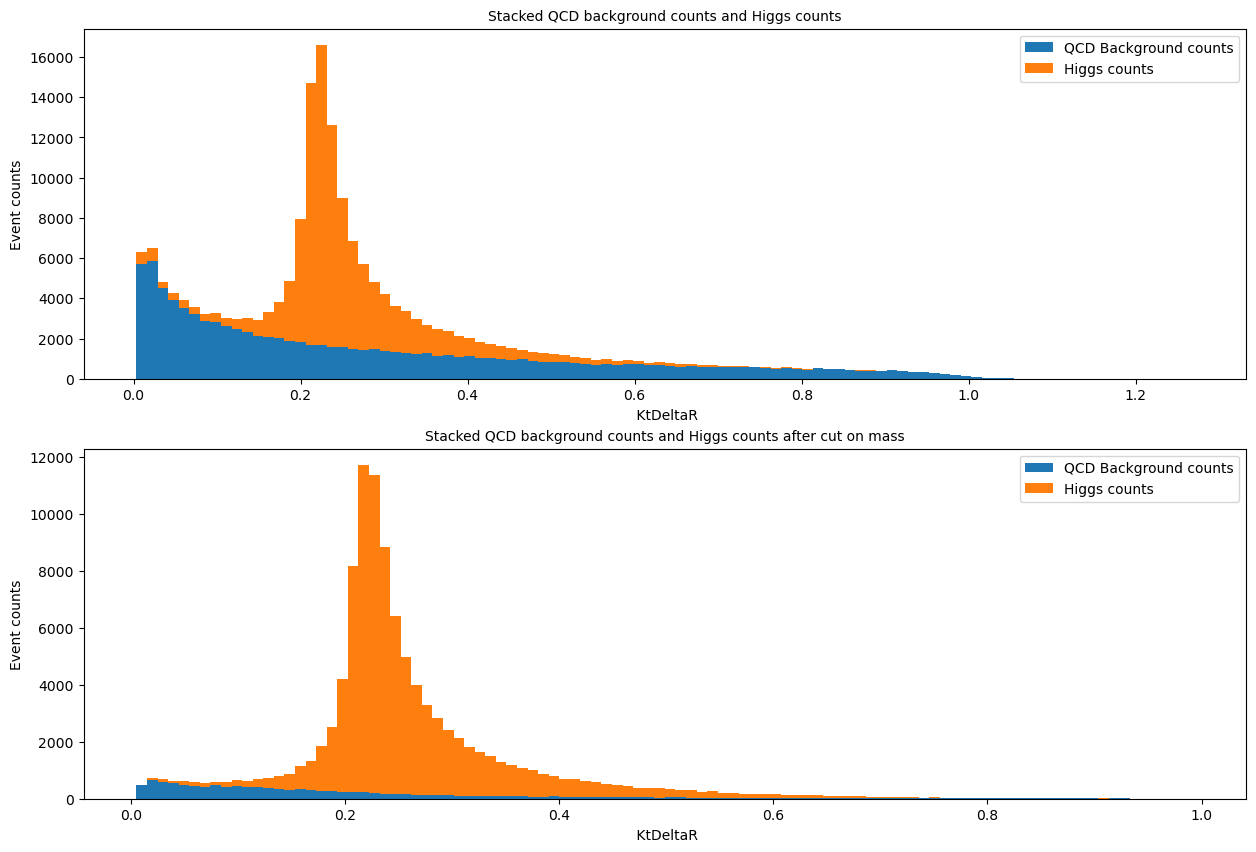

In [23]:
plot_stacked_hist_comparison(qcddata, higgsdata, mass_best_qcd_sliced, mass_best_higgs_sliced, 'KtDeltaR', 'after cut on mass')

From the above we can see that prior to the split on mass there was an opportunity to remove a significant amount of the background data while preserving much of the Higgs events if we were to keep events between 0.1 and 0.4 but this split would not provide an improvement as noticeable as as the split on mass.  After splitting on mass we see that there is still an opportunity to improve the significance of our measurement with a split on the feature KtDeltaR by performing a similar split as previously outlined.  Specifically keeping events from 0.1 or 0.15 to 1.0.

#### Summarization of findings

To summarize the above findings: we found that none of the features would be as discriminatory as the feature mass however the features KtDeltaR and t3 would be the next best features to perform the original split on.  Similarly, we found that KtDeltaR and t3 are also great features to split on after our original mass split.  Some runner up features to consider after the two previously mentioned features are t21, ee2, t2, d2, and angularity which would, approximately, provide improvements in the order listed - from best to worst.

### Problem 4

#### The second split

Provided the analysis done in the previous problem we will perform more splits on the data sets in an attempt to improve the significance.  We will first begin with comparing a few splits on KtDeltaR and t3 to find which feature should be split on second.  Once we have made this comparison we will split on the other feature third and then can decide to proceed accordingly with the results by possibly splitting further on t21, ee2, t2, d2, and angularity.

We will again use both the final significance for each split and the percentage of data remaining to evaluate which split is the best choice.

In [24]:
def specific_slices(qcd, higgs, feature, min_max_values):
    qcd_sliced = []
    higgs_sliced = []
    signal_sigma = []
    
    best_sigma = -100
    best_sigma_index = -1
    for min_value, max_value in min_max_values:
        curr_qcd_sliced, curr_higgs_sliced, curr_signal_sigma = slice_data(qcd, higgs, feature, min_value, max_value)
        
        # store the values for this iteration
        qcd_sliced.append(curr_qcd_sliced)
        higgs_sliced.append(curr_higgs_sliced)
        signal_sigma.append(curr_signal_sigma)
        
        # update our best result if needed
        if curr_signal_sigma > best_sigma:
            best_sigma = curr_signal_sigma
            best_sigma_index = len(signal_sigma) - 1
        
    # return only the best information
    return qcd_sliced[best_sigma_index], higgs_sliced[best_sigma_index], signal_sigma[best_sigma_index], min_max_values[best_sigma_index][0], min_max_values[best_sigma_index][1]

Our process for splitting on KtDeltaR will be to take an initial large window and increase the value of the left window boundary after each split in order to decrease the window size.  Below we try a few different splits and print the significance and the percentage of data remaining.

In [25]:
# first we will slice on KtDeltaR
KtDeltaR_min_max_values = [(0.1, 0.8), (0.125, 0.8), (0.15, 0.8), (0.2, 0.8), (0.25, 0.8), (0.3, 0.8)]

KtDeltaR_best_qcd_sliced, KtDeltaR_best_higgs_sliced, KtDeltaR_best_signal_sigma, KtDeltaR_best_min_value, KtDeltaR_best_max_value = specific_slices(mass_best_qcd_sliced, mass_best_higgs_sliced, 'KtDeltaR', KtDeltaR_min_max_values)


After a cut on the data with respect to KtDeltaR between values 0.1 and 0.8 the discovery significance became 3.7210 sigma.
Additionally, after this cut we have 94.10% of the overall Higgs remaining and 7.46% of the overall background remaining.

After a cut on the data with respect to KtDeltaR between values 0.125 and 0.8 the discovery significance became 3.9067 sigma.
Additionally, after this cut we have 93.46% of the overall Higgs remaining and 6.42% of the overall background remaining.

After a cut on the data with respect to KtDeltaR between values 0.15 and 0.8 the discovery significance became 4.1642 sigma.
Additionally, after this cut we have 92.30% of the overall Higgs remaining and 5.55% of the overall background remaining.

After a cut on the data with respect to KtDeltaR between values 0.2 and 0.8 the discovery significance became 4.3006 sigma.
Additionally, after this cut we have 83.72% of the overall Higgs remaining and 4.09% of the overall background remaining.

After a c

Our process for splitting on t3 will be to take an initial large window and increase the value of the right window boundary after each split in order to increase the window size.  Below we try a few different splits and print the significance and the percentage of data remaining.

In [26]:
# next we will slice on t3
t3_min_max_values = [(0, 0.2), (0, 0.35), (0, 0.4), (0, 0.45), (0, 0.5), (0, 0.55), (0, 0.6)]

t3_best_qcd_sliced, t3_best_higgs_sliced, t3_best_signal_sigma, t3_best_min_value, t3_best_max_value = specific_slices(mass_best_qcd_sliced, mass_best_higgs_sliced, 't3', t3_min_max_values)


After a cut on the data with respect to t3 between values 0 and 0.2 the discovery significance became 8.2459 sigma.
Additionally, after this cut we have 58.61% of the overall Higgs remaining and 0.31% of the overall background remaining.

After a cut on the data with respect to t3 between values 0 and 0.35 the discovery significance became 5.7101 sigma.
Additionally, after this cut we have 88.15% of the overall Higgs remaining and 2.40% of the overall background remaining.

After a cut on the data with respect to t3 between values 0 and 0.4 the discovery significance became 4.9860 sigma.
Additionally, after this cut we have 91.41% of the overall Higgs remaining and 3.54% of the overall background remaining.

After a cut on the data with respect to t3 between values 0 and 0.45 the discovery significance became 4.4400 sigma.
Additionally, after this cut we have 93.24% of the overall Higgs remaining and 4.85% of the overall background remaining.

After a cut on the data with respect to t3

#### Comparing the t3 and KtDeltaR splits

As we had previously mentioned before we performed the mass cut - we would like to maximize the number of Higgs events left  (without going below 90% of the original Higgs events still being present in the dataset) while minimizing the number of QCD events.  While satisfying the previous two requirements, we will also only choose data cuts that increase our significance.  

Let's recall that with the base data our significance was $1.1282\sigma$.  After the first mass cut this significance improved to $2.9261\sigma$.  Now above we have performed various cuts for the feature KtDeltaR and t3.  Observing these slices we can pick out some of the best cuts from each feature:

For KtDeltaR:
- We got a significance of 4.3006 sigma when keeping values between 0.2 and 0.8.  This slice left 83.72% of the Higgs data.
- We got a significance of 4.1642 sigma when keeping values between 0.15 and 0.8.  This slice left 92.30% of the Higgs data.
- We got a significance of 3.9067 sigma when keeping values between 0.125 and 0.8.  This slice left 93.46% of the Higgs data.

For t3 we will only select cuts that provided a significance better than the listed KtDeltaR slices:
- We got a significance of 8.2459 sigma when keeping values between 0 and 0.2.  This slice left 58.61% of the Higgs data.
- We got a significance of 5.7101 sigma when keeping values between 0 and 0.35.  This slice left 88.15% of the Higgs data.
- We got a significance of 4.9860 sigma when keeping values between 0 and 0.4.  This slice left 91.41% of the Higgs data.
- We got a significance of 4.4400 sigma when keeping values between 0 and 0.45.  This slice left 93.24% of the Higgs data.
- We got a significance of 4.0289 sigma when keeping values between 0 and 0.5.  This slice left 93.32% of the Higgs data.

Now based on our previous criteria, all of the above cuts improve the significance from $2.9261\sigma$.  Additionally, we will only consider cuts that leave at least 90% of the Higgs data - this eliminates the first cut listed above for KtDeltaR and the first two cuts for t3.  Now evaluating the remaining cuts, we see that t3 is the next best feature to slice on.  We can draw this conclusion because with 92.30% of the Higgs left over, KtDeltaR only provides a significance of $4.1642\sigma$ which is less than the significance provided by a t3 cut - $4.4400\sigma$ while preserving 93.24% of the Higgs data.

Thus the next most discriminative feature is t3.  When looking at the three available options above, we will choose the slice which provides a significance of $4.9860\sigma$ while preserving 91.41% of the Higgs data.  This significance is achieved when keeping events where their t3 value is between 0 and 0.4.

#### The third split

With our first two slices, first on mass and then on t3, we will continue to slice with a goal of getting a significance of $5\sigma$ or above while preserving at least 90% of the Higgs background events.  As we found KtDeltaR to be another great feature to split on - just not as good as t3 - we will next evaluate a collection of splits on this feature given the mass and t3 splits and then proceed accordingly based on what is achieved.

Let's begin by plotting the stacked histogram of KtDeltaR before and after the splits:

In [27]:
# get the current data set after the first two splits
mass_t3_best_qcd_sliced, mass_t3_best_higgs_sliced, mass_t3_best_signal_sigma = slice_data(mass_best_qcd_sliced, mass_best_higgs_sliced, 't3', 0, 0.4)


After a cut on the data with respect to t3 between values 0 and 0.4 the discovery significance became 4.9860 sigma.
Additionally, after this cut we have 91.41% of the overall Higgs remaining and 3.54% of the overall background remaining.



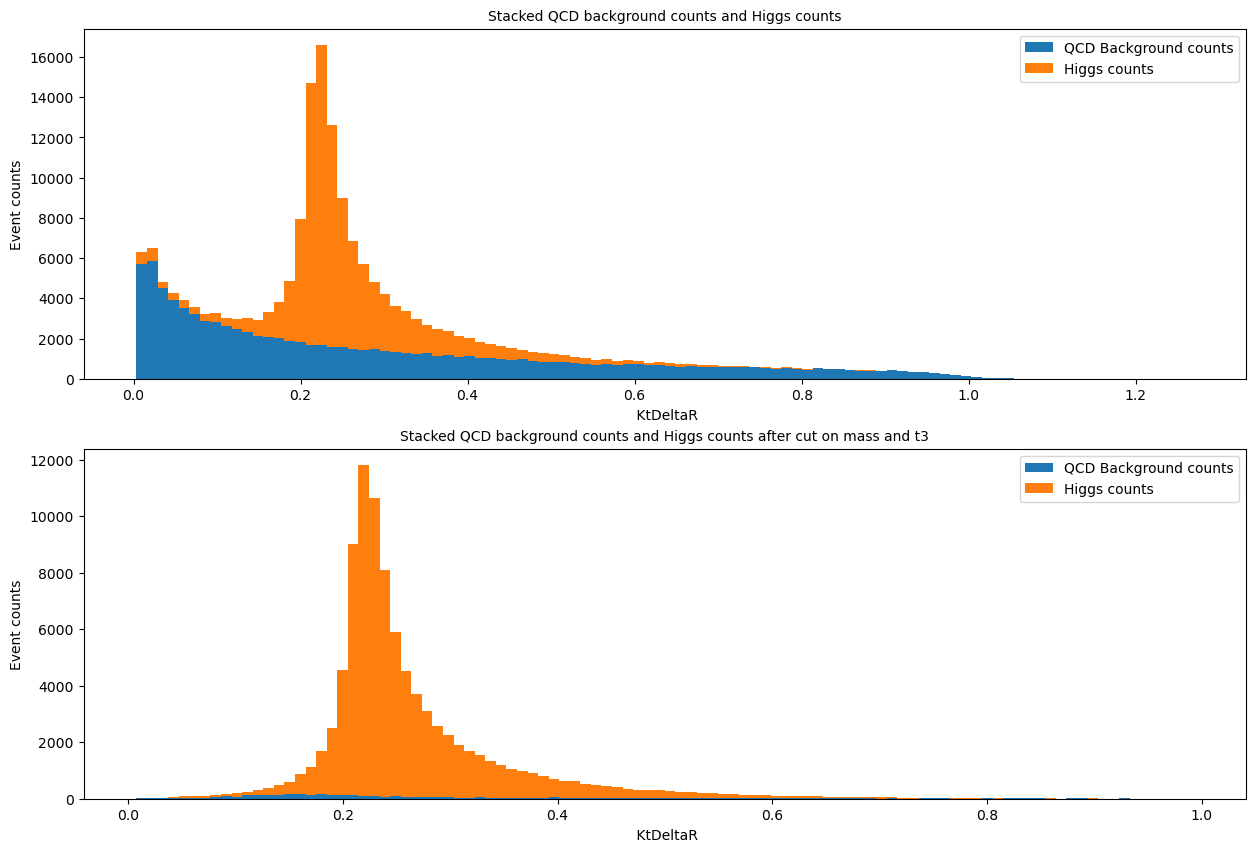

In [28]:
# lets plot KtDeltaR
plot_stacked_hist_comparison(qcddata, higgsdata, mass_t3_best_qcd_sliced, mass_t3_best_higgs_sliced, 'KtDeltaR', 'after cut on mass and t3')


After plotting the feature KtDeltaR given the mass and t3 cut we see hardly any background left however in order to improve our singificance we will explore cutting different windows that cut parts of the right tail and left trail of the distribution off.  We will do this in the following way: start with a window of some size and we will slowly increase the left boundary value while decreasing the right boundary value to see how we change our significance.

In [29]:
# first we will slice on KtDeltaR
KtDeltaR_min_max_values_2 = [(0.05, 0.9), (0.1, 0.8), (0.125, 0.7), (0.15, 0.7)]

KtDeltaR_best_qcd_sliced_2, KtDeltaR_best_higgs_sliced_2, KtDeltaR_best_signal_sigma_2, KtDeltaR_best_min_value_2, KtDeltaR_best_max_value_2 = specific_slices(mass_t3_best_qcd_sliced, mass_t3_best_higgs_sliced, 'KtDeltaR', KtDeltaR_min_max_values_2)


After a cut on the data with respect to KtDeltaR between values 0.05 and 0.9 the discovery significance became 5.0475 sigma.
Additionally, after this cut we have 91.31% of the overall Higgs remaining and 3.44% of the overall background remaining.

After a cut on the data with respect to KtDeltaR between values 0.1 and 0.8 the discovery significance became 5.2467 sigma.
Additionally, after this cut we have 90.94% of the overall Higgs remaining and 3.11% of the overall background remaining.

After a cut on the data with respect to KtDeltaR between values 0.125 and 0.7 the discovery significance became 5.5542 sigma.
Additionally, after this cut we have 90.37% of the overall Higgs remaining and 2.73% of the overall background remaining.

After a cut on the data with respect to KtDeltaR between values 0.15 and 0.7 the discovery significance became 5.7585 sigma.
Additionally, after this cut we have 89.57% of the overall Higgs remaining and 2.38% of the overall background remaining.



From the above slices we see that we have reached our goal!  All four values above result in a significance larger than $5\sigma$ and all but one of them preserve the 90% Higgs remaining bound.  Of the three results that satisfy both of these conditions we see that the maximum sigma value comes when removing events with a KtDeltaR outside of the range 0.125 to 0.7.  This slice results in a significance of $5.5542\sigma$ while also preserving 90.37% of the Higgs events.

Let's get our final data set after the three best splits found:

In [34]:
mass_t3_KtDeltaR_best_qcd_sliced, mass_t3_KtDeltaR_best_higgs_sliced, mass_t3_KtDeltaR_best_signal_sigma = slice_data(mass_t3_best_qcd_sliced, mass_t3_best_higgs_sliced, 'KtDeltaR', 0.125, 0.7)
best_qcd_sliced = mass_t3_KtDeltaR_best_qcd_sliced
best_higgs_sliced = mass_t3_KtDeltaR_best_higgs_sliced

After a cut on the data with respect to KtDeltaR between values 0.125 and 0.7 the discovery significance became 5.5542 sigma.
Additionally, after this cut we have 90.37% of the overall Higgs remaining and 2.73% of the overall background remaining.



#### Final Process

Now we let's recap the process used to achieve a significance of $5.5542\sigma$:
1) Split the original data (significance of $1.1282\sigma$) on the feature mass, removing events from the QCD and Higgs sets that have a mass outside of the range $120 \ GeV/c^2$ and $140 \ GeV/c^2$.  This yields a significance of $2.9261\sigma$.
2) Split the data from the previous step on the feature t3, removing events from the QCD and Higgs sets that have a t3 outside of the range 0 to 0.4.  This yields a significance of $4.9860\sigma$.
3) Split the data from the previous step on the feature KtDeltaR, removing events from the QCD and Higgs sets that have a KtDeltaR outside of the range 0.125 to 0.7.  This yields a significance of $5.5542\sigma$.

After splitting on mass first, then t3, then KtDeltaR we get a final significance of $5.5542\sigma$ where 90.37% of the Higgs events are preserved with 97.27% of the QCD background events being removed.

#### Comparison with Jennifer Vo's report

My lab partner Jennifer Vo did a similar analysis on a different set of data.  Her set of data was once again 100k QCD background events and 100k Higgs Boson events except her events all have a transverse momentum, pT, between 250 and 500 where all of my events have a transverse momentum between 1000 and 12000.  Throughout her analysis, she identified two splits to maximize her significance: her first split was on the feature mass and her second split was on the feature d2.  This resulted in a significance of $5.0317\sigma$ where 64.70% of the Higgs events are preserved with 99.27% of the QCD background events being removed.

Comparing my result with my lab partner's result, both of us achieved a significance larger than $5\sigma$ which is the most important result however her cuts did not meet my arbitrary 90% threshold for the number of Higgs events to be preserved.  In practice both of our slicing processes should provide high discovery confidence for collected real data, rather than simulated data.

# Lab 8

In this part of the lab we will be using our optimized event selections to hunt for our Higgs Boson within pseudo-experiment data sets.  We have two data sets that we will be looking through, both have events with a transverse momentum in the same range as our previous Higgs and QCD data sets (i.e., from 1000 to 1200) however one of the new sets is for low luminosity events while the other contains high luminocity events.

Let's begin by loading the two new data sets:

In [31]:
# open the files
import pandas
lowlumi = pandas.read_hdf('data_lowLumi_pt_1000_1200.h5')
highlumi = pandas.read_hdf('data_highLumi_pt_1000_1200.h5')

## Problem 1 - High Luminosity Observation Data

Now that we have the data loaded, let's plot the high luminosity observed data overlapped with the expected signal and background data added together for each feature, before and after the optimal split.  These curves will be normalized such that the area under both curves will be the same.

Before we generate our plots, let's first apply the same splits above to both the high and low luminosity data sets:

In [32]:
def slice_lumi_data(lumi, feature, min_value, max_value):
    # cut the lumi data
    lumi_sliced = lumi.drop(lumi[lumi[feature] < min_value].index)
    lumi_sliced = lumi_sliced.drop(lumi_sliced[lumi_sliced[feature] > max_value].index)
    
    return lumi_sliced

# lets slice the high luminosity data
highlumi_sliced = slice_lumi_data(highlumi, 'mass', 120, 140)
highlumi_sliced = slice_lumi_data(highlumi_sliced, 't3', 0, 0.4)
highlumi_sliced = slice_lumi_data(highlumi_sliced, 'KtDeltaR', 0.125, 0.7)

# lets slice the low luminosity data
lowlumi_sliced = slice_lumi_data(lowlumi, 'mass', 120, 140)
lowlumi_sliced = slice_lumi_data(lowlumi_sliced, 't3', 0, 0.4)
lowlumi_sliced = slice_lumi_data(lowlumi_sliced, 'KtDeltaR', 0.125, 0.7)

Now that we have sliced the high luminosity data we will plot the stacked Higgs and QCD data with the observed data on the same plot.  We will then make a second plot of the same lines but with the sliced data.  We will make these two plots for each of the features used to achieve our best split.

When graphing the stacked background and Higgs we will normalize the data according to the current observed data such that the area under both curves is equivalent and the ratio between the Higgs and QCD remains constant.  With both of these contraints held the data will be properly normalized.

Let's generate these plots:

In [35]:
def compare_observed_to_simulation(feature, lumi, qcd, higgs, lumi_sliced, qcd_sliced, higgs_sliced):
    # lets begin by computing the expected yields for the data
    base_yield_qcd, base_yield_higgs = compute_yields(len(qcd), len(higgs))
    sliced_yield_qcd, sliced_yield_higgs = compute_yields(len(qcd_sliced), len(higgs_sliced))
    
    # now lets compute the ratio of ratio of higgs and of qcd in the simulated data
    base_R_qcd = base_yield_qcd / (base_yield_higgs + base_yield_qcd)
    base_R_higgs = base_yield_higgs / (base_yield_higgs + base_yield_qcd)
    sliced_R_qcd = sliced_yield_qcd / (sliced_yield_higgs + sliced_yield_qcd)
    sliced_R_higgs = sliced_yield_higgs / (sliced_yield_higgs + sliced_yield_qcd)
    
    # now that we have the ratios lets create combined normalized arrays for plotting
    base_stacked_normalized = [qcd[f'{feature}'], higgs[f'{feature}']]
    sliced_stacked_normalized = [qcd_sliced[f'{feature}'], higgs_sliced[f'{feature}']]
    
    # lets also compute the weights to scale the histogram heights by
    base_weights_qcd = np.ones(len(qcd)) * base_R_qcd * (len(lumi) / len(qcd))
    base_weights_higgs = np.ones(len(higgs)) * base_R_higgs * (len(lumi) / len(higgs))
    sliced_weights_qcd = np.ones(len(qcd_sliced)) * sliced_R_qcd * (len(lumi_sliced) / len(qcd_sliced))
    sliced_weights_higgs = np.ones(len(higgs_sliced)) * sliced_R_higgs * (len(lumi_sliced) / len(higgs_sliced))
    
    # lets plot the stacked histogram
    fs = 10
    bins = 50
    plt.subplot(2, 1, 1)
    plt.hist(base_stacked_normalized, bins=bins, stacked=True, weights=[base_weights_qcd, base_weights_higgs], label=['QCD Background counts', 'Higgs counts'])
    plt.hist(lumi[f'{feature}'], bins=bins, stacked=True, histtype='step', linewidth=2, label='Observed Data')
    plt.title("Unsliced Data")
    plt.xlabel(f'{feature}', fontsize=fs)
    plt.ylabel('Event counts', fontsize=fs)
    plt.tick_params(labelsize=fs)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.hist(sliced_stacked_normalized, bins=bins, stacked=True, weights=[sliced_weights_qcd, sliced_weights_higgs], label=['QCD Background counts', 'Higgs counts'])
    plt.hist(lumi_sliced[f'{feature}'], bins=bins, stacked=True, histtype='step', linewidth=2, label='Observed Data')
    plt.title("Sliced Data")
    plt.xlabel(f'{feature}', fontsize=fs)
    plt.ylabel('Event counts', fontsize=fs)
    plt.tick_params(labelsize=fs)
    plt.legend()
    
    plt.show()

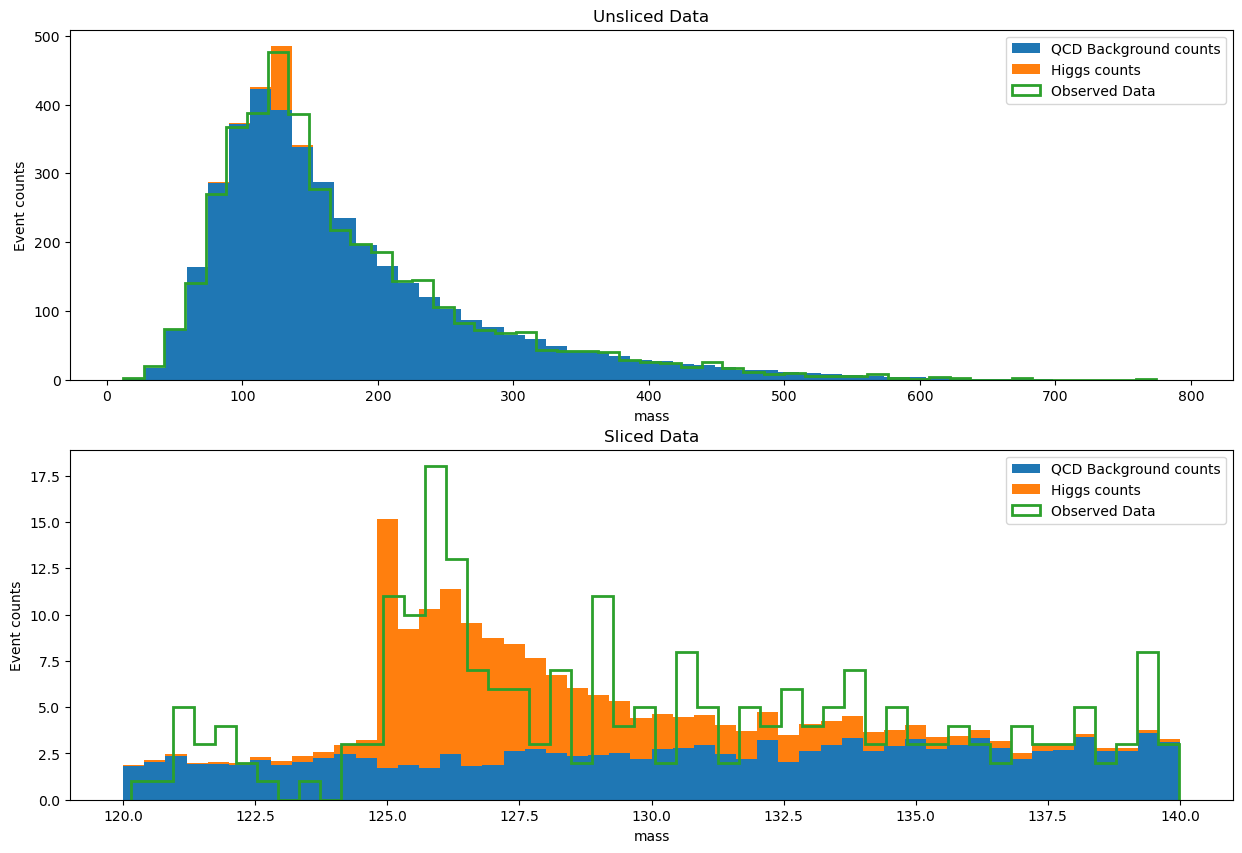

In [39]:
compare_observed_to_simulation('mass', highlumi, qcddata, higgsdata, highlumi_sliced, best_qcd_sliced, best_higgs_sliced)

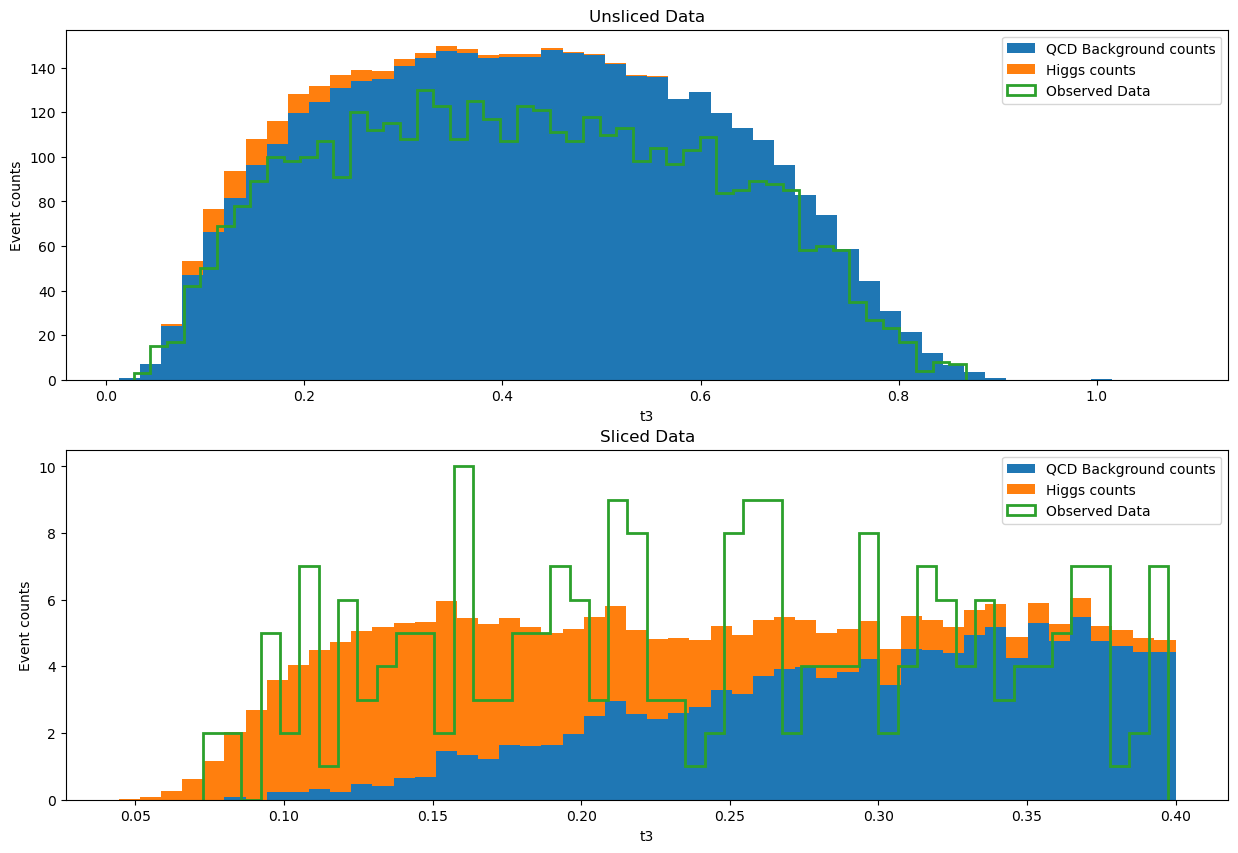

In [37]:
compare_observed_to_simulation('t3', highlumi, qcddata, higgsdata, highlumi_sliced, best_qcd_sliced, best_higgs_sliced)

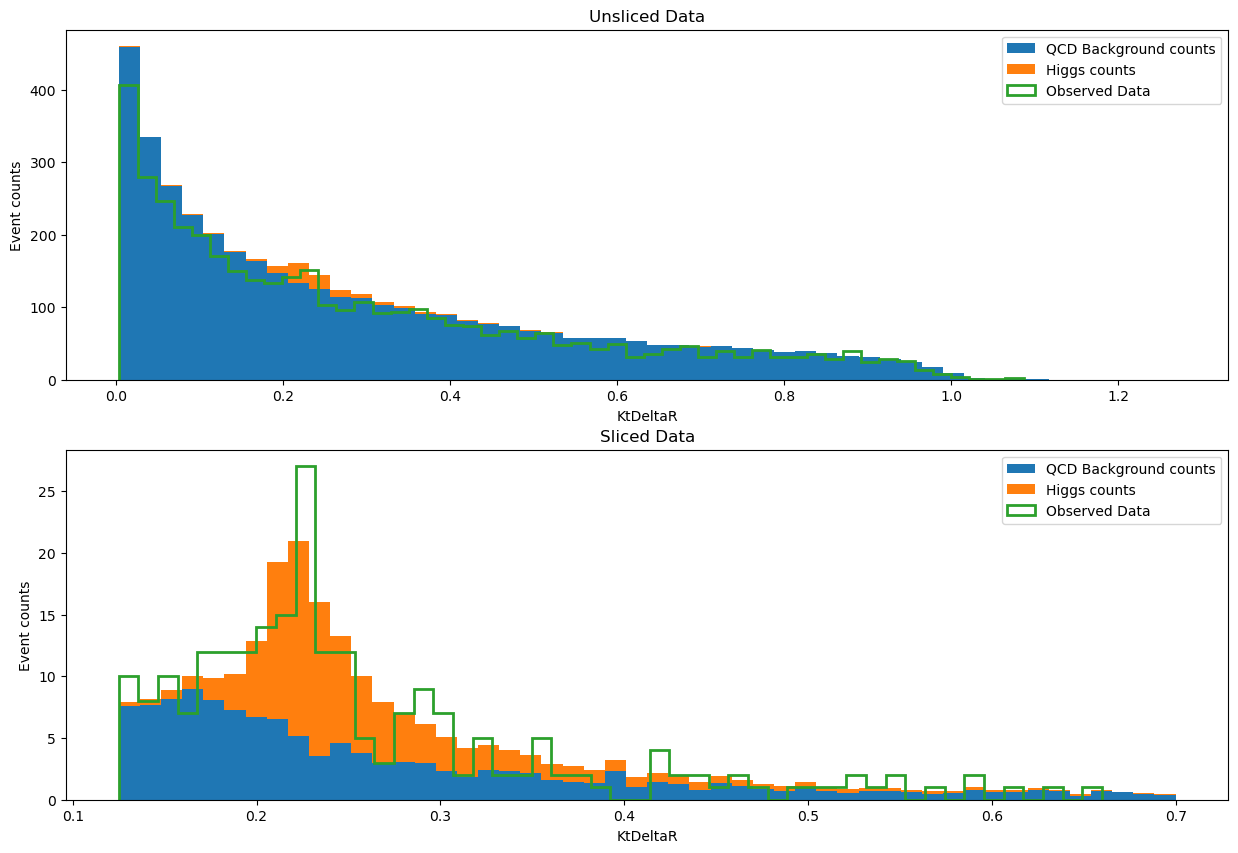

In [38]:
compare_observed_to_simulation('KtDeltaR', highlumi, qcddata, higgsdata, highlumi_sliced, best_qcd_sliced, best_higgs_sliced)

We see from the above plots that the observed data does appear to follow the features captured by the Higgs Boson data thus our expectation is that a high significance will be associated with the observed value.  We will determine this significance by answering the following question:

> How significant is my observed signal provided the background which is Poisson distributed provided larger signals are as signal like or more?

Let's now determine the parameter for the Poisson (the expected yield of the QCD data), the observed signal (the length of the sliced luminosity data), and finally the significance of our observed signal.

In [45]:
# the poisson parameter
lambda_highlumi, qw = compute_yields(len(best_qcd_sliced), 0)
print(f'The parameter for the Poisson distribution is: {lambda_highlumi}')

# the signal
signal_highlumi = len(highlumi_sliced)
print(f'Our signal is {signal_highlumi}')

# the significance
sigma_highlumi = compute_poisson_sigma_value(lambda_highlumi, signal_highlumi)
print(f'The significance of our signal is {sigma_highlumi:.3f} sigma')

The parameter for the Poisson distribution is: 54
Our signal is 229
The significance of our signal is 17.713 sigma


From the results above we see that our signal of 229 after applying the feature selection to our high luminosity observation data yields a significance of $17.713\sigma$ thus we have a signficant measurement.  This can be compared to our expectation - the null hypothesis - and if we had met our expectation then we would have expected our signal to be 54 but instead we found a signal 175 above our null hypothesis expectation.

## Problem 2 - Low Luminosity Observation Data

Let's plot the low luminosity observed data overlapped with the expected signal and background data added together for each feature, before and after the optimal split.  These curves will be normalized accordingly as they were in the previous question.

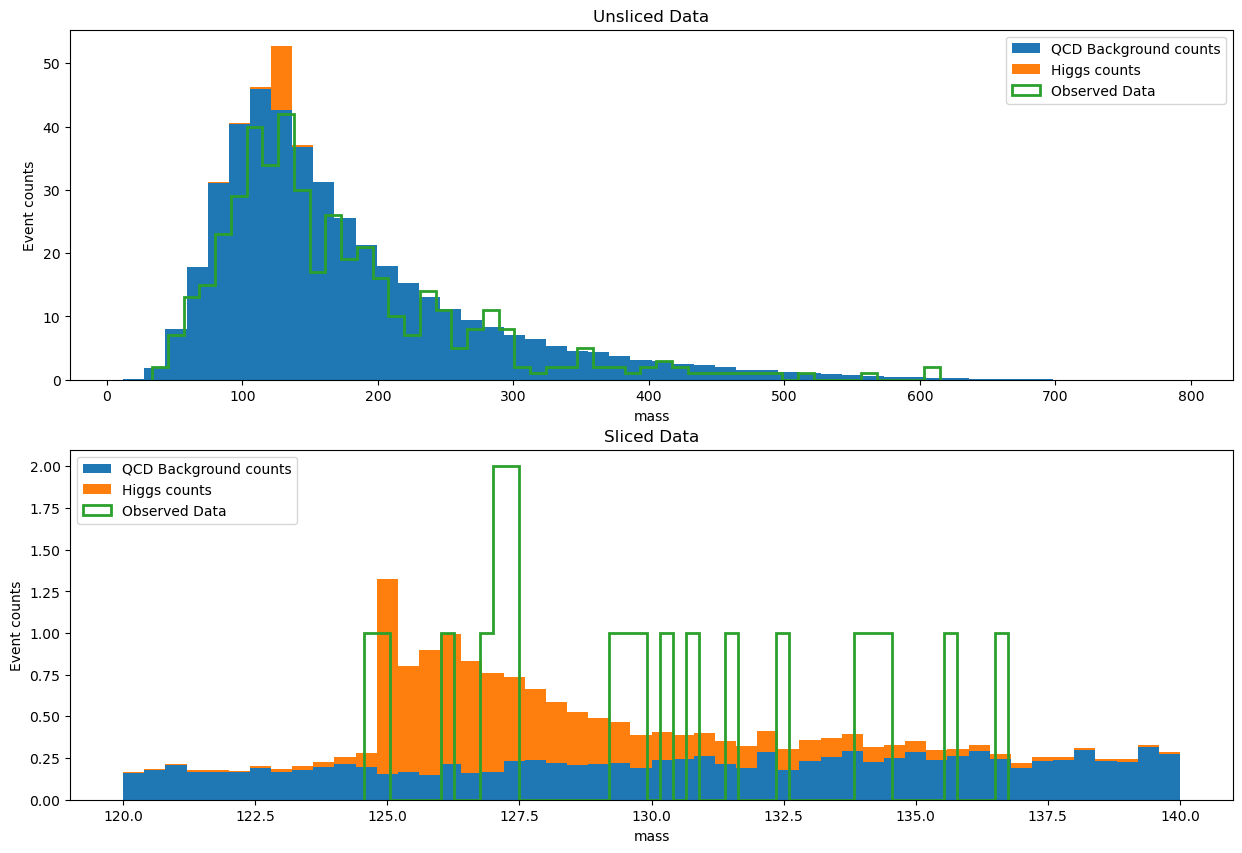

In [46]:
compare_observed_to_simulation('mass', lowlumi, qcddata, higgsdata, lowlumi_sliced, best_qcd_sliced, best_higgs_sliced)

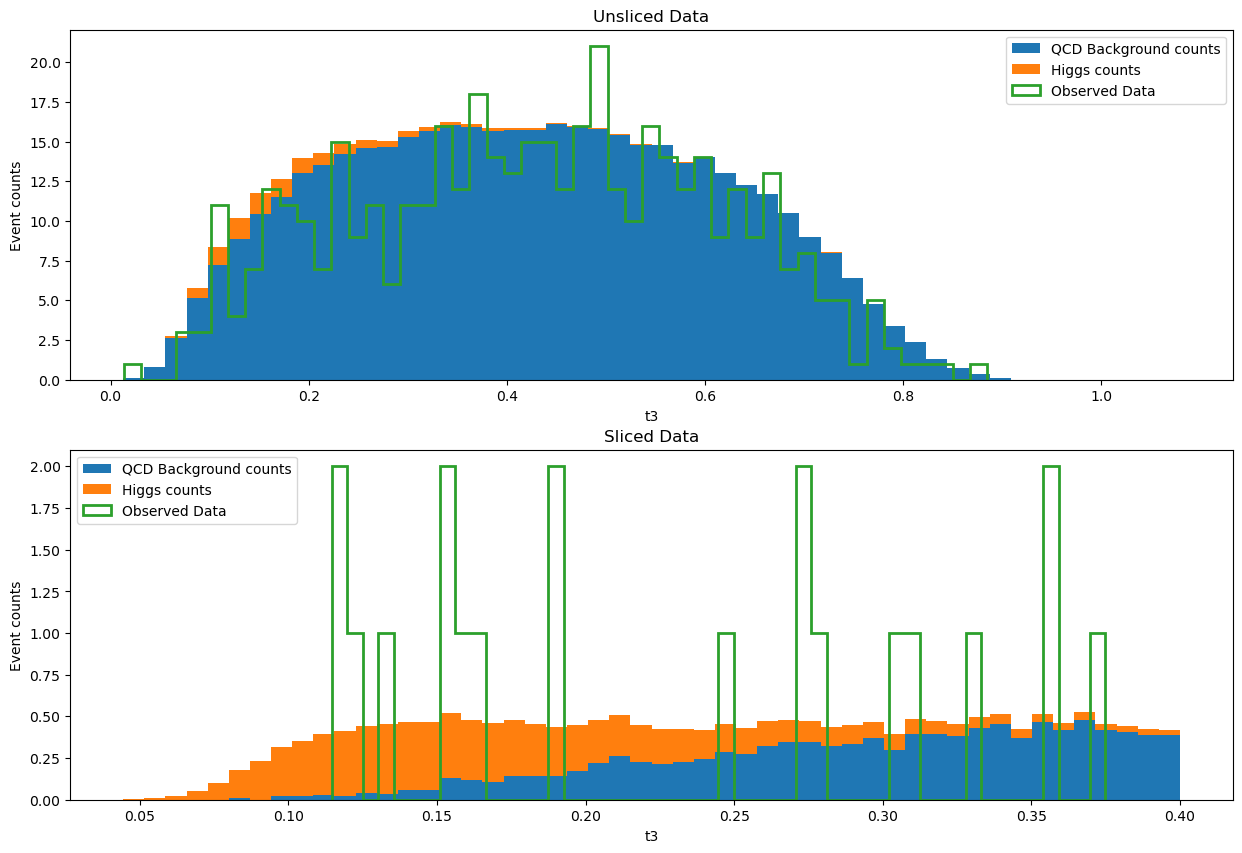

In [47]:
compare_observed_to_simulation('t3', lowlumi, qcddata, higgsdata, lowlumi_sliced, best_qcd_sliced, best_higgs_sliced)

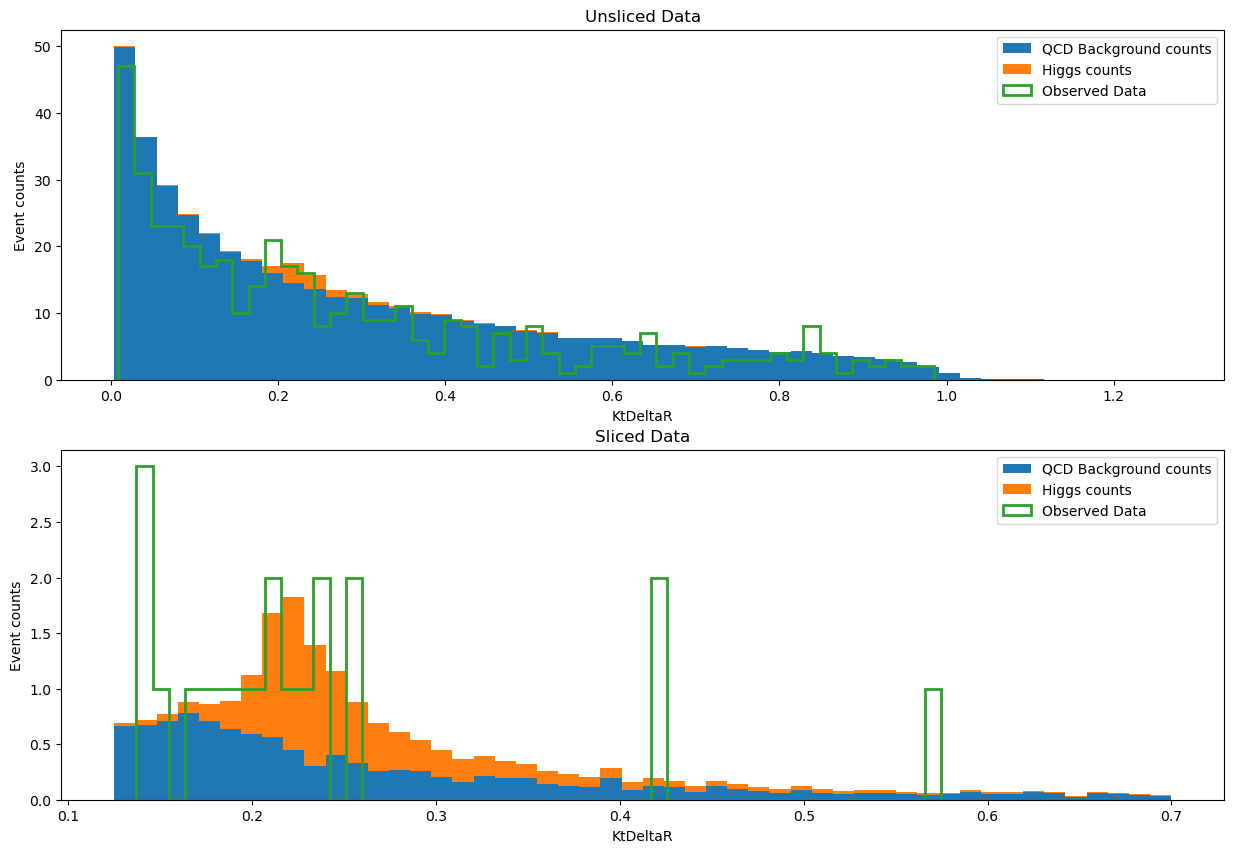

In [48]:
compare_observed_to_simulation('KtDeltaR', lowlumi, qcddata, higgsdata, lowlumi_sliced, best_qcd_sliced, best_higgs_sliced)

From above we see that the observed data does not match the stacked signal and background data as it did previously.  We also see this in the plots after slicing the data as there seems to be not much of a correspondance between the observed data and the stacked data - which at this point is mainly Higgs.

> How significant is my observed signal provided the background which is Poisson distributed with a parameter of 54 provided larger signals are as signal like or more?

Let's now determine the observed signal (the length of the sliced luminosity data) and the significance of our observed signal.

In [49]:
# the poisson parameter
lambda_lowlumi, qw = compute_yields(len(best_qcd_sliced), 0)
print(f'The parameter for the Poisson distribution is: {lambda_lowlumi}')

# the signal
signal_lowlumi = len(lowlumi_sliced)
print(f'Our signal is {signal_lowlumi}')

# the significance
sigma_lowlumi = compute_poisson_sigma_value(lambda_lowlumi, signal_lowlumi)
print(f'The significance of our signal is {sigma_lowlumi:.3f} sigma')

The parameter for the Poisson distribution is: 54
Our signal is 20
The significance of our signal is -5.198 sigma


From the results above we see that our signal of 20 after applying the feature selection to our low luminosity observation data yields a significance of $-5.198\sigma$ thus we do not have a signficant measurement.  Let's compare this result with our expectation: the null hypothesis.  Under our expectation we hypothesized that if the observed data is true background data then approximately the same percentage of data would be remain after splitting as we found when splitting the QCD data.  Now let's calculate the percentage remaining of the observed data and compare that with the percentage remaining of QCD data:

In [52]:
print(f'Percentage of high luminosity observed data remaining: {((len(highlumi_sliced) / len(highlumi)) * 100):.2f}%')
print(f'Percentage of low luminosity observed data remaining: {((len(lowlumi_sliced) / len(lowlumi)) * 100):.2f}%')
print(f'Percentage of QCD background data remaining: {((len(best_qcd_sliced) / len(qcddata)) * 100):.2f}%')

Percentage of high luminosity observed data remaining: 5.63%
Percentage of low luminosity observed data remaining: 4.52%
Percentage of QCD background data remaining: 2.73%


From the above percentages we see that for both the QCD background data and the observed data hed nearly all of the data removed through the choosen feature selection process.  We can thus conclude that our results followed our expectation and that the observed data appears to be drawn from the background.  When comparing to the percentage of observed data removed from the high lumonisity set we see that they are realtively close however the high luminosity observed data set was much larger and thus is able to capture more of the complex behavior occuring in the detector when compared to the low luminosity data.  This is why we see such a stark difference in the significance provided about the same amount of data is remaining in both data splits.

## Problem 3 - Confidence Levels

In the low luminosity observed data we found that the observed significance was less than $5\sigma$.  As this was our result, let's calculate the 95% confidence level upper limit of the signal yield.

To calculate this upper limit we first must construct a 2D histogram of the data after feature selection has been applied.

In [108]:
# draw data for our background
draw_amount = 20000000
bkgd = stats.poisson.rvs(lambda_lowlumi, size=draw_amount)

# draw data for our injected signals
signal_low = -100
signal_high = 200
signal = np.random.randint(low=signal_low, high=signal_high+1, size=draw_amount)

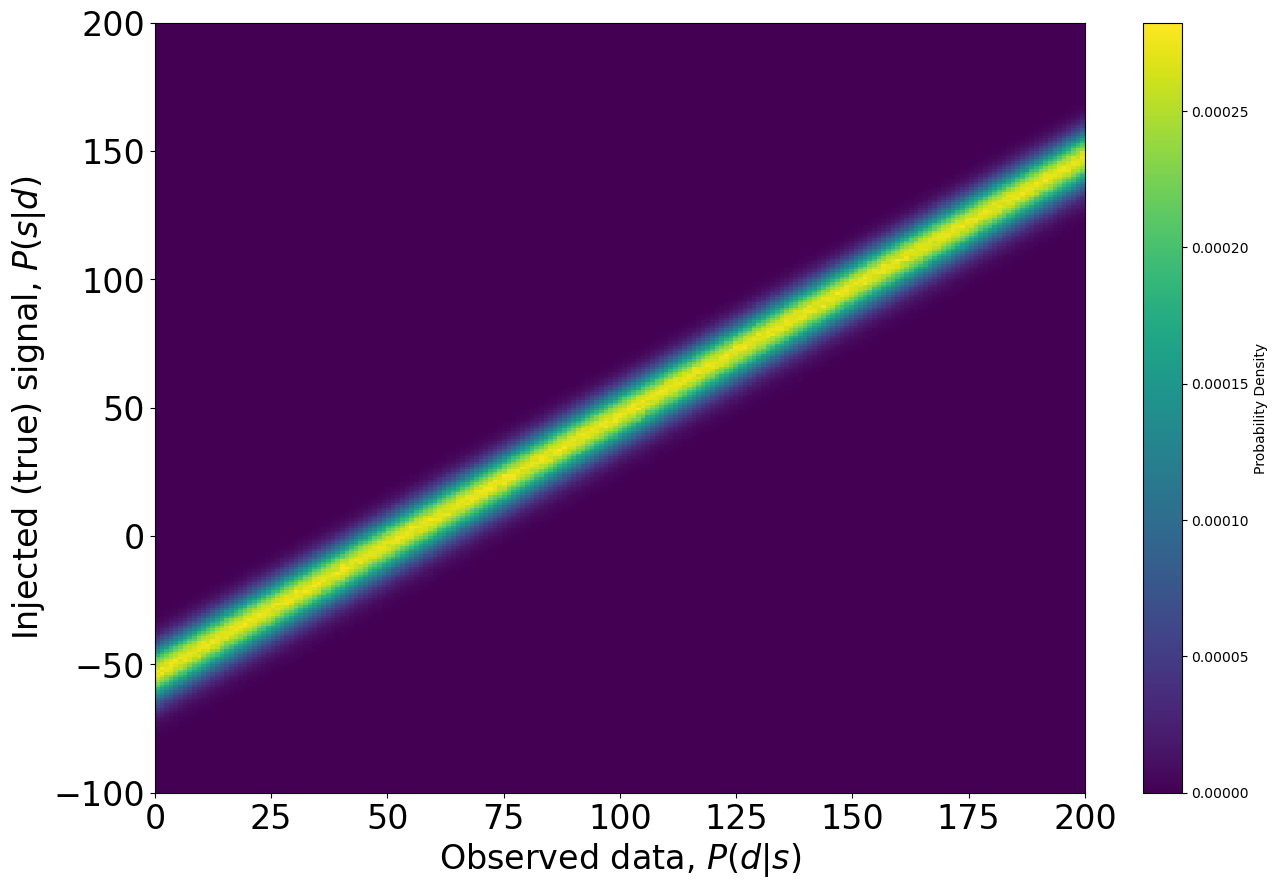

In [109]:
# define our overall data
data = bkgd + signal

# define our bin edges
signaledges = np.linspace(signal_low, signal_high, signal_high - signal_low + 1)
combinededges_min = 0
combinededges_high = 200
combinededges = np.linspace(combinededges_min, combinededges_high, combinededges_high - combinededges_min + 2)

# group the results into bins
Psd, temp, temp2 = np.histogram2d(data, signal, bins=[combinededges, signaledges], density=True)
# note: temp == dataedges and temp2 == signaledges

# plot
def plot_2d_hist(signaledges, dataedges, Psd):
    datacenters = (dataedges[:-1] + dataedges[1:]) / 2
    signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
    plt.pcolormesh(datacenters, signalcenters, Psd.T, shading='auto')
    plt.tick_params(labelsize=24)
    plt.ylabel('Injected (true) signal, $P(s|d)$', fontsize = 24)
    plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
    plt.colorbar(label='Probability Density')
    plt.show()

plot_2d_hist(signaledges, combinededges, Psd)

Now that we have the 2D histogram we will take a vertical slice at the expected value to compute the expected 95% confidence interval by determining what signal value we would have seen 95% of the time:

In [112]:
def normalize_confidence_intervals(vector):
    return vector * (1 / np.sum(vector))

# lets determine our expected value
yield_qcd_best, yield_higgs_best = compute_yields(len(best_qcd_sliced), len(best_higgs_sliced))
expected_value = yield_qcd_best + yield_higgs_best
print(f'Our expected value is {expected_value}')

# lets take a vertical slice at this value
higgs_probs_expected_value = normalize_confidence_intervals(Psd[expected_value+1, :])

# now we want to know the value where below that value the area under the curve is 95%
area_threshold = 0.95
current_signal = 0
current_area = 0
for current_value in higgs_probs_expected_value:
    current_area += current_value
    if current_area > area_threshold:
        break
    
    current_signal += 1
    
print(f'The expected 95% confidence interval is {signaledges[current_signal]}')

Our expected value is 99
The expected 95% confidence interval is 58.0


From the above code we found that the expected 95% confidence interval is 58.

Let's take a vertical slice at the observed value and compute the observed 95% confidence interval:

In [113]:
# lets determine our observed value
observed_value = len(lowlumi_sliced)
print(f'Our expected value is {observed_value}')

# lets take a vertical slice at this value
higgs_probs_observed_value = normalize_confidence_intervals(Psd[observed_value+1, :])

# now we want to know the value where below that value the area under the curve is 95%
area_threshold = 0.95
current_signal = 0
current_area = 0
for current_value in higgs_probs_observed_value:
    current_area += current_value
    if current_area > area_threshold:
        break
    
    current_signal += 1
    
print(f'The expected 95% confidence interval is {signaledges[current_signal]}')

Our expected value is 20
The expected 95% confidence interval is -21.0


From the above code we found that the observed 95% confidence interval is -21.0

From the above results we found that given our expected signal we can say with confidence that a true signal (i.e., number of Higgs) under or equal to 58% cannot correspond to a Higgs Boson signal.  Additionally we found that for the observed signal it is impossible for a signal of 20 to correspond to a Higgs Boson because the corresponding 95% confidence interval value is negative and we know that our signal must be a positive value as there is no concept of a negative number of Higgs Bosons.

Thus we find that our expectation is much more reasonable than our observation for the low luminosity observation data and we would therefore use the value from our expectation to set a 95% confidence interval bound.

In [114]:
# QUESTION: 

'''
in problem 1/2 should the signal value for the sigma calculation bet equal to the
length of the lumi array plus the poisson lambda value? no right?  well whats up with the
observed 95% confidence interval above...
'''

'\nin problem 1/2 should the signal value for the sigma calculation bet equal to the\nlength of the lumi array plus the poisson lambda value? no right?  well whats up with the\nobserved 95% confidence interval above...\n'